# Prediction of risk of mortality one year after pulmonary transplantation
The goal of this project is to  build a model to predict the risk of mortality one year after a pulmonary transplantation.
Our dataset come's from  Bichat's hospital in Paris. It contains information on 252 patients.
Class distribution: 189 Alive, 63 Dead.

44 contains null values
There is no duplicated data
208 not null values

In this version, to remplace null values, I used the median for each group of target variable

# Import Libraries

In [37]:
from libraries import *

In [38]:
#dir(libraries)

# Data Exploration

In [39]:
pulmonary_imp = pd.read_excel("Base de donnees greffe pulmonaire_Ian.xlsx",sheet_name='Sheet1',usecols = "B:AU")

In [40]:
pulmonary_imp.head(25)

NIP (identifiant) date de TP  Age  Sexe (0=F, 1=M)  BMI (body mass index)  \
0          8005805551 2015-03-31   52                0                   26.0   
1          8009205234 2017-12-28   63                1                   18.0   
2          8004902968 2019-11-29   45                1                   31.0   
3          8009284788 2018-11-27   56                0                   28.0   
4          8004982944 2017-08-13   63                0                   20.0   
5          8005052740 2020-03-04   64                1                   24.0   
6          8007248277 2017-05-18   65                1                   25.0   
7          8005011089 2016-09-11   54                1                   23.0   
8          8004760186 2019-11-21   66                1                   24.0   
9          8011572076 2019-01-15   71                1                   24.0   
10         8009721788 2019-12-28   59                1                   30.0   
11         8004992222 2016-04-03   60                1                   30.0   
12         8010357769 2018-07-21   62                1                   31.1   
13         8010486580 2018-08-23   63                0                   17.3   
14         8006290174 2016-12-05   65                1                   28.0   
15         8005079343 2015-11-13   59                1                   25.0   
16         8010354644 2018-12-07   63                1                   25.0   
17         8004761746 2019-04-11   59                1                   25.0   
18         8012271403 2020-01-04   64                1                   31.0   
19         8008372826 2018-02-01   65                1                   28.0   
20         8011480645 2020-02-26   66                0                   27.0   
21         8008108560 2017-04-24   56                1                   21.0   
22         8006046547 2017-06-19   66                1                   24.0   
23         8003113092 2019-02-21   58                0                   25.0   
24         8003305268 2019-07-11   24                1                   17.0   

    BMI< ou egal 18  BMI>30  BMI>25  cardiopathie ischémique  \
0                 0       0       1                        0   
1                 1       0       0                        0   
2                 0       1       1                        0   
3                 0       0       1                        0   
4                 0       0       0                        0   
5                 0       0       0                        0   
6                 0       0       1                        1   
7                 0       0       0                        0   
8                 0       0       0                        0   
9                 0       0       0                        0   
10                0       1       1                        0   
11                0       1       1                        0   
12                0       1       1                        0   
13                1       0       0                        0   
14                0       0       1                        0   
15                0       0       1                        0   
16                0       0       1                        0   
17                0       0       1                        1   
18                0       1       1                        0   
19                0       0       1                        0   
20                0       0       1                        0   
21                0       0       0                        0   
22                0       0       0                        0   
23                0       0       1                        0   
24                1       0       0                        0   

    diabètepré-opératoire  ...  \
0                       1  ...   
1                       0  ...   
2                       0  ...   
3                       0  ...   
4                       0  ...   
5                       0  .

In [41]:
pulmonary_imp.dtypes

NIP (identifiant)                                                         int64
date de TP                                                       datetime64[ns]
Age                                                                       int64
Sexe (0=F, 1=M)                                                           int64
BMI (body mass index)                                                   float64
BMI< ou egal 18                                                           int64
BMI>30                                                                    int64
BMI>25                                                                    int64
cardiopathie ischémique                                                   int64
diabètepré-opératoire                                                     int64
PAPM (pression artérielle pulmonaire moyenne)                           float64
étiologie BPCO                                                            int64
étiologie Fibrose                       

In [42]:
pulmonary_imp.isnull().sum()

NIP (identifiant)                                                 0
date de TP                                                        0
Age                                                               0
Sexe (0=F, 1=M)                                                   0
BMI (body mass index)                                             0
BMI< ou egal 18                                                   0
BMI>30                                                            0
BMI>25                                                            0
cardiopathie ischémique                                           0
diabètepré-opératoire                                             0
PAPM (pression artérielle pulmonaire moyenne)                    23
étiologie BPCO                                                    0
étiologie Fibrose                                                 0
Autres étiologies                                                 2
Mismatch CMV (R-/D+)                            

In [43]:
#Dropping unnecessary columns
pulmonary_imp.drop(["NIP (identifiant)","date de TP"],axis=1,inplace=True)
# Defining name for feature columns
feature_cols = pulmonary_imp.columns
feature_cols

Index(['Age', 'Sexe (0=F, 1=M)', 'BMI (body mass index)', 'BMI< ou egal 18',
       'BMI>30', 'BMI>25', 'cardiopathie ischémique', 'diabètepré-opératoire',
       'PAPM (pression artérielle pulmonaire moyenne)', 'étiologie BPCO',
       'étiologie Fibrose', 'Autres étiologies', 'Mismatch CMV (R-/D+)',
       'ECMO pré-opératoire', 'Super Urgence',
       'type de TP (0=monopulmonaire, 1=bipulmonaire)', 'Ischémie Froide Max',
       'Analgésie péridurale ', 'ECMO peropératoire ',
       'Transfusion per opératoire >2 CGR', 'SOFA J0', 'IGS2 J0',
       'Nb Jours Noradrénaline ', 'Nb Jours Ventilation mécanique',
       'ECMO en Réanimation', 'Nb jours d'ECMO en réanimation',
       'Dysfonction primaire du greffon grade 3 ', 'insuffisance rénale aiguë',
       'dialyse en réanimation', 'bactériémie', 'Pneumonie (tous germes)',
       'Pneumonie à BLSE et/ou Pyo en réanimation',
       'Pneumonie acquise sous ventilation mécanique à BLSE et/ou Pyo',
       'Trachéotomie',
       'Sténose 

In [44]:
pulmonary_imp.describe()

Age  Sexe (0=F, 1=M)  BMI (body mass index)  BMI< ou egal 18  \
count  252.000000       252.000000             252.000000       252.000000   
mean    54.246032         0.638889              23.865873         0.134921   
std     11.027807         0.481279               4.651721         0.342319   
min     15.000000         0.000000              14.000000         0.000000   
25%     50.000000         0.000000              20.000000         0.000000   
50%     57.000000         1.000000              24.000000         0.000000   
75%     62.000000         1.000000              27.000000         0.000000   
max     71.000000         1.000000              35.100000         1.000000   

           BMI>30      BMI>25  cardiopathie ischémique  diabètepré-opératoire  \
count  252.000000  252.000000               252.000000             252.000000   
mean     0.119048    0.456349                 0.043651               0.107143   
std      0.324489    0.499082                 0.204724               0.309910   
min      0.000000    0.000000                 0.000000               0.000000   
25%      0.000000    0.000000                 0.000000               0.000000   
50%      0.000000    0.000000                 0.000000               0.000000   
75%      0.000000    1.000000                 0.000000               0.000000   
max      1.000000    1.000000                 1.000000               1.000000   

       PAPM (pression artérielle pulmonaire moyenne)  étiologie BPCO  ...  \
count                                     229.000000      252.000000  ...   
mean                                       25.720524        0.357143  ...   
std                                         7.723885        0.480111  ...   
min                                         8.000000        0.000000  ...   
25%                                        21.000000        0.000000  ...   
50%                                        25.000000        0.000000  ...   
75%                                        30.000000        1.000000  ...   
max                                        56.000000        1.000000  ...   

       Sténose bronchique grave dans l'année (stent ou dilatation)  \
count                                         252.000000             
mean                                            0.250000             
std                                             0.433874             
min                                             0.000000             
25%                                             0.000000             
50%                                             0.000000             
75%                                             0.250000             
max                                             1.000000             

       Fistule bronchique dans l'année  rejet humoral dans l'année  \
count                       252.000000                  252.000000   
mean                          0.150794                    0.194444   
std                           0.358560                    0.396560   
min                           0.000000                    0.000000   
25%                           0.000000                    0.000000   
50%                           0.000000                    0.000000   
75%                           0.000000                    0.000000   
max                           1.000000                    1.000000   

       rejet cellulaire dans l'année   pleurésie <1an  \
count                      251.000000      247.000000   
mean                         0.243028        0.153846   
std                          0.429769        0.361534   
min                          0.000000        0.000000   
25%                          0.000000        0.000000   
50%                          0.000000        0.000000   
75%                          0.000000        0.000000   
max                          1.000000        1.000000   

       durée de séjour en réanimation (1er séjour)  \
count                                   252.000000   
mea

In [45]:
pulmonary_imp.count()

Age                                                              252
Sexe (0=F, 1=M)                                                  252
BMI (body mass index)                                            252
BMI< ou egal 18                                                  252
BMI>30                                                           252
BMI>25                                                           252
cardiopathie ischémique                                          252
diabètepré-opératoire                                            252
PAPM (pression artérielle pulmonaire moyenne)                    229
étiologie BPCO                                                   252
étiologie Fibrose                                                252
Autres étiologies                                                250
Mismatch CMV (R-/D+)                                             251
ECMO pré-opératoire                                              252
Super Urgence                     

In [46]:
# adding a new target variable
condition1 = pulmonary_imp['mortalité à J30'] == 1
condition2 = pulmonary_imp['mortalité à 90j'] == 1
condition3 = pulmonary_imp['mortalité à un an'] == 1

output0 = 0
output1 = 1
output2 = 2
output3 = 3

# Apply multiple conditions and outputs using nested numpy.select()
pulmonary_imp['target'] = np.select(
    [condition1, ~condition1 & condition2, ~condition1 & ~condition2 & condition3],
    [output1, output2, output3],
    default= output0
)

In [47]:
pulmonary_imp.target.unique()

array([0, 1, 3, 2])

In [48]:
pulmonary_imp['mortalité à un an'].value_counts()

0    189
1     63
Name: mortalité à un an, dtype: int64

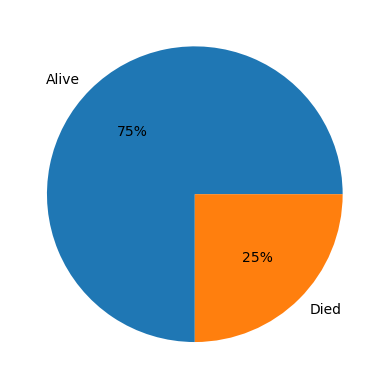

In [49]:
plt.pie(pulmonary_imp['mortalité à un an'].value_counts(), labels = ['Alive','Died'], autopct='%.0f%%', colors = sns.color_palette('tab10'))
plt.show()

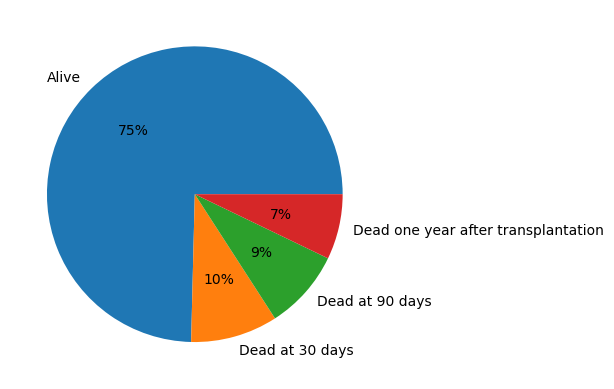

In [50]:
#There is a higher percentage of patients who died the first 30 days after transplatntation. As thethe number of days increases, the risk of dead also decreases.
plt.pie(pulmonary_imp['target'].value_counts(), labels = ['Alive','Dead at 30 days', 'Dead at 90 days','Dead one year after transplantation'], autopct='%.0f%%', colors = sns.color_palette('tab10'))
plt.show()

In [51]:
# adding a new target variable
condition1 = pulmonary_imp['Age'].between(0,17)
condition2 = pulmonary_imp['Age'].between(18,24)
condition3 = pulmonary_imp['Age'].between(25,30)
condition4 = pulmonary_imp['Age'].between(31,40)
condition5 = pulmonary_imp['Age'].between(41,50)
condition6 = pulmonary_imp['Age'].between(51,60)

output0 = "entre 0 et 17"
output1 = "entre 18 et 24"
output2 = "entre 25 et 30"
output3 = "entre 31 et 40"
output4 = "entre 41 et 50"
output5 = "entre 51 et 60"
output6 = "plus de 60 "

# Apply multiple conditions and outputs using nested numpy.select()
pulmonary_imp['Groupedage'] = np.select(
    [condition1, condition2, condition3, condition4, condition5, condition6],
    [output0, output1, output2,output3,output4,output5],
    default= output6
)

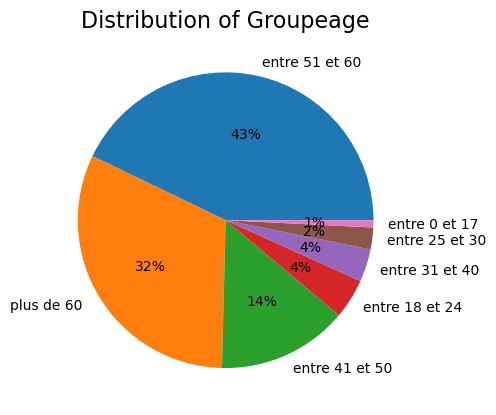

In [52]:
plt.pie(pulmonary_imp["Groupedage"].value_counts(), labels = pulmonary_imp["Groupedage"].unique(), autopct='%.0f%%', colors = sns.color_palette('tab10'))
plt.title("Distribution of Groupeage", fontsize = 16)
plt.axis('off')
plt.show()

In [53]:
# Defining feature and target set as X and Y respectively
X, Y = pulmonary_imp.drop(['mortalité à J30','mortalité à 90j','mortalité à un an','target'],axis=1), pulmonary_imp[['mortalité à J30','mortalité à 90j','mortalité à un an','target']]

In [54]:
X['Age'].unique().min()

15

Sexe (0=F, 1=M)
*************************************


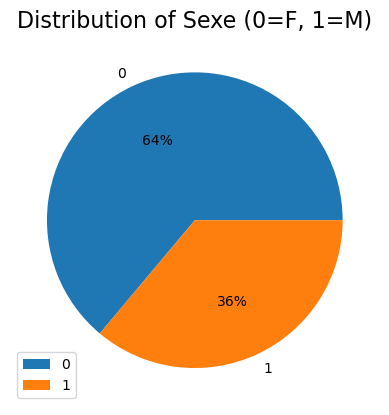

BMI< ou egal 18
*************************************


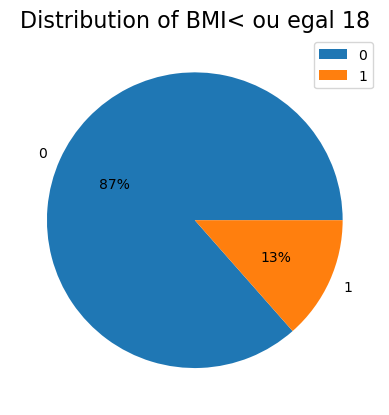

BMI>30
*************************************


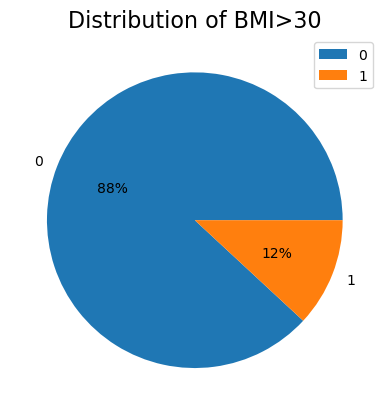

BMI>25
*************************************


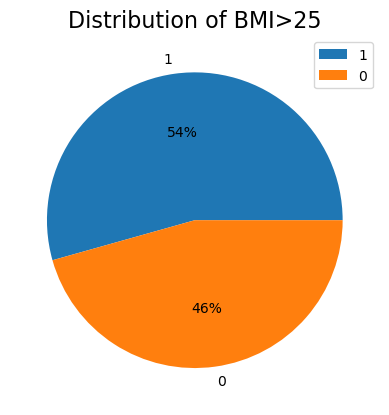

cardiopathie ischémique
*************************************


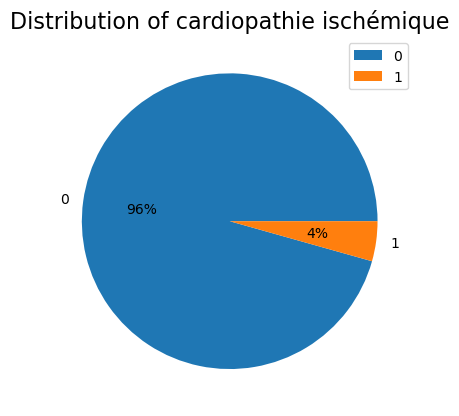

diabètepré-opératoire
*************************************


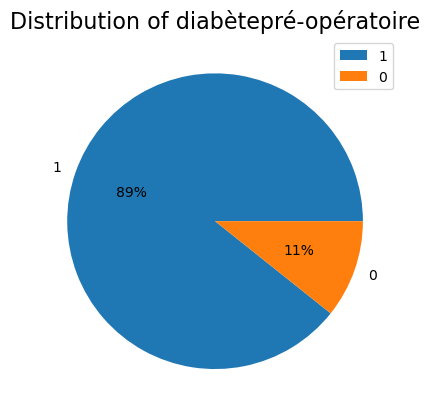

étiologie BPCO
*************************************


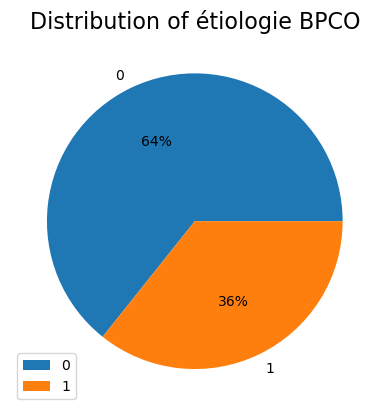

étiologie Fibrose
*************************************


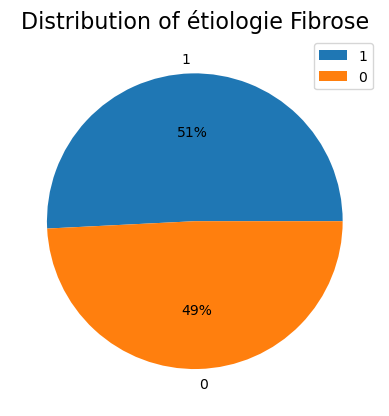

ECMO pré-opératoire
*************************************


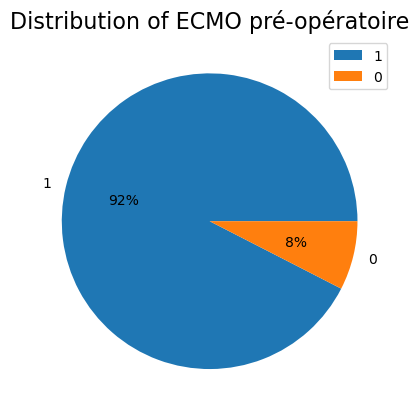

type de TP (0=monopulmonaire, 1=bipulmonaire)
*************************************


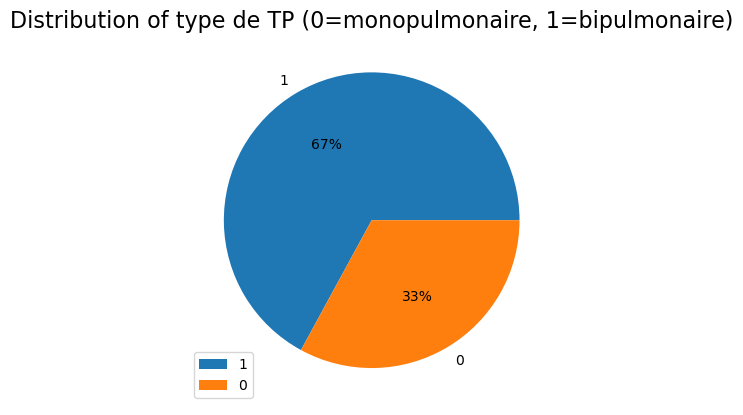

ECMO peropératoire 
*************************************


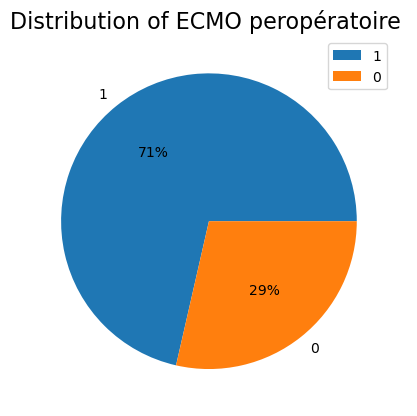

ECMO en Réanimation
*************************************


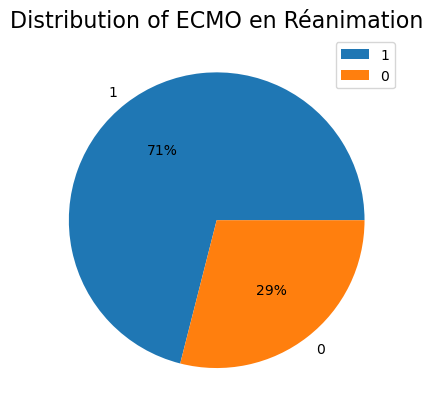

Dysfonction primaire du greffon grade 3 
*************************************


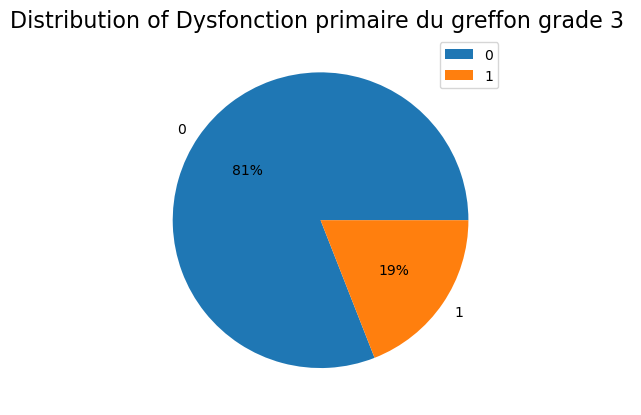

insuffisance rénale aiguë
*************************************


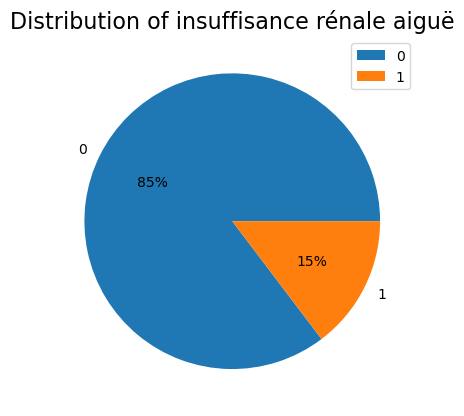

dialyse en réanimation
*************************************


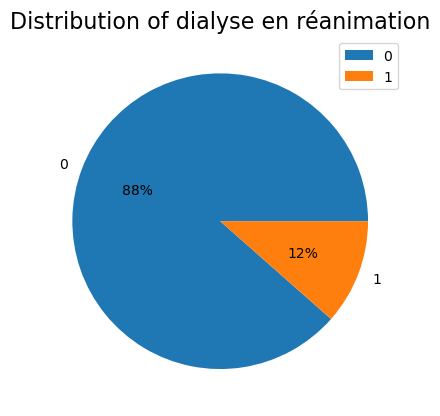

bactériémie
*************************************


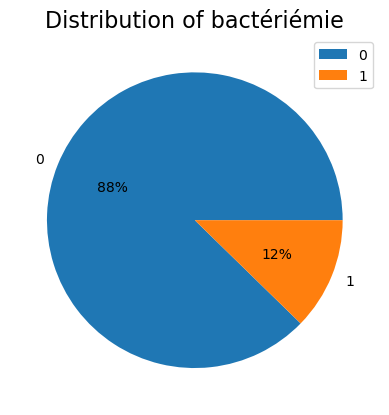

Pneumonie à BLSE et/ou Pyo en réanimation
*************************************


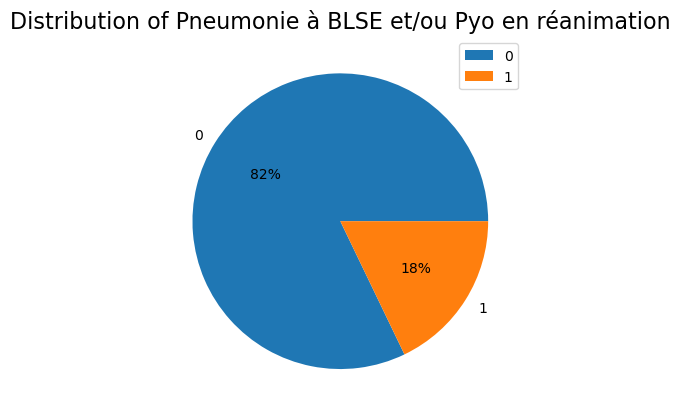

Pneumonie acquise sous ventilation mécanique à BLSE et/ou Pyo
*************************************


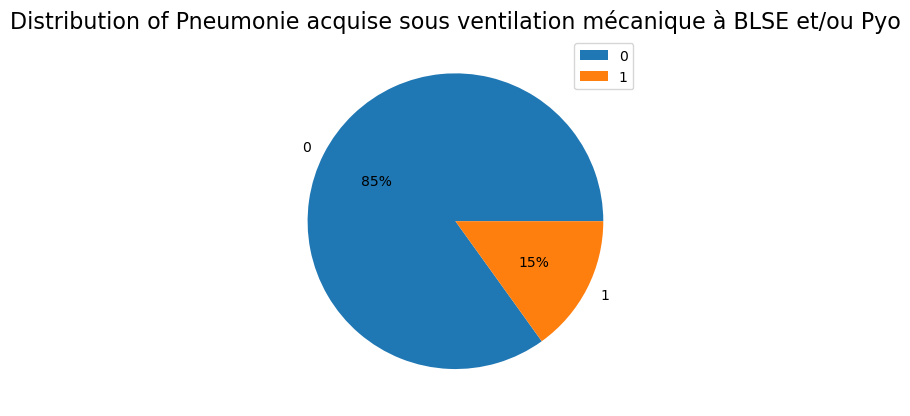

Trachéotomie
*************************************


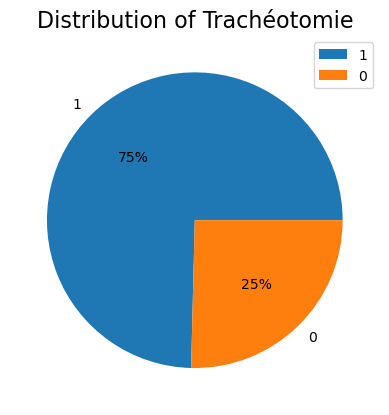

Sténose bronchique grave dans l'année (stent ou dilatation)
*************************************


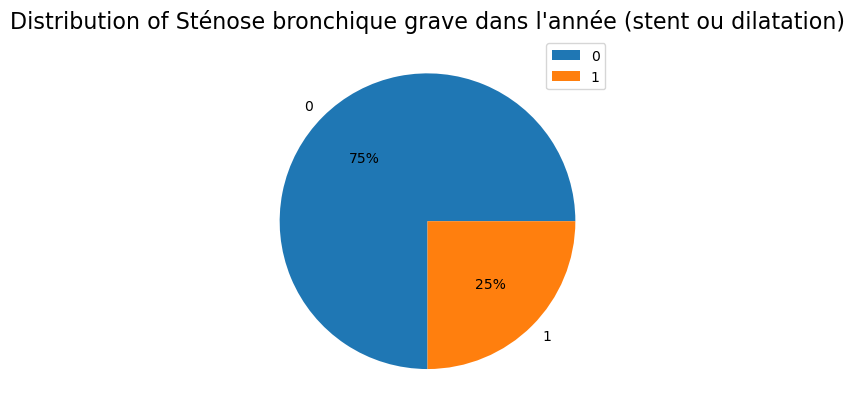

Fistule bronchique dans l'année
*************************************


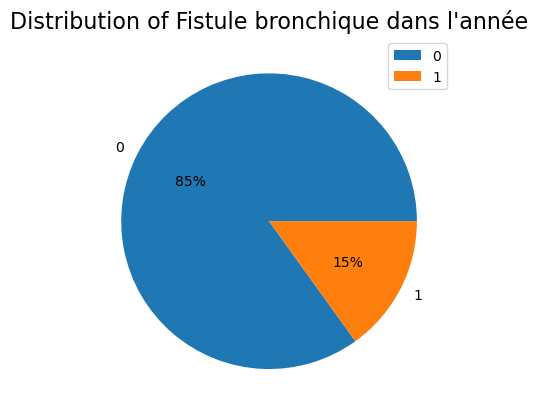

rejet humoral dans l'année
*************************************


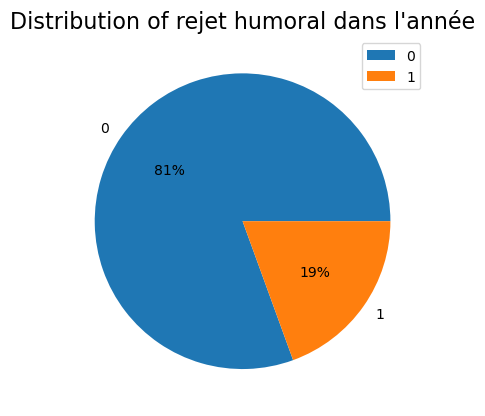

mortalité dans le premier séjour réanimation
*************************************


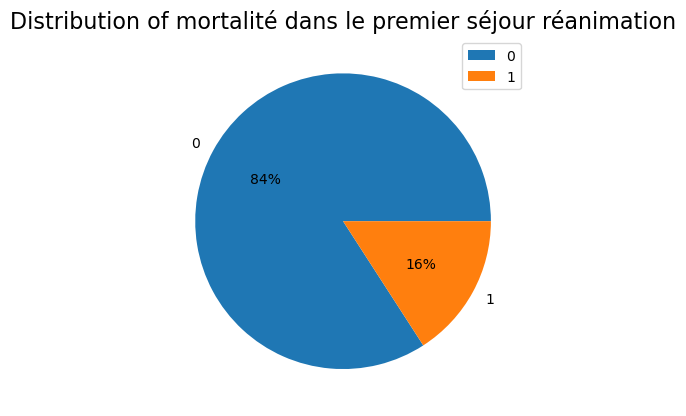

In [55]:
for i in X.columns:
  if len(pulmonary_imp[i].unique()) < 6 and pulmonary_imp[i].isnull().sum()==0:
    print(i)
    print('*************************************')
    plt.pie(pulmonary_imp[i].value_counts(), labels = pulmonary_imp[i].unique(), autopct='%.0f%%', colors = sns.color_palette('tab10'))
    plt.title("Distribution of "+i, fontsize = 16)
    plt.axis('off')
    plt.legend()
    plt.show()

# Histogram

In [56]:
X.columns.shape

(42,)

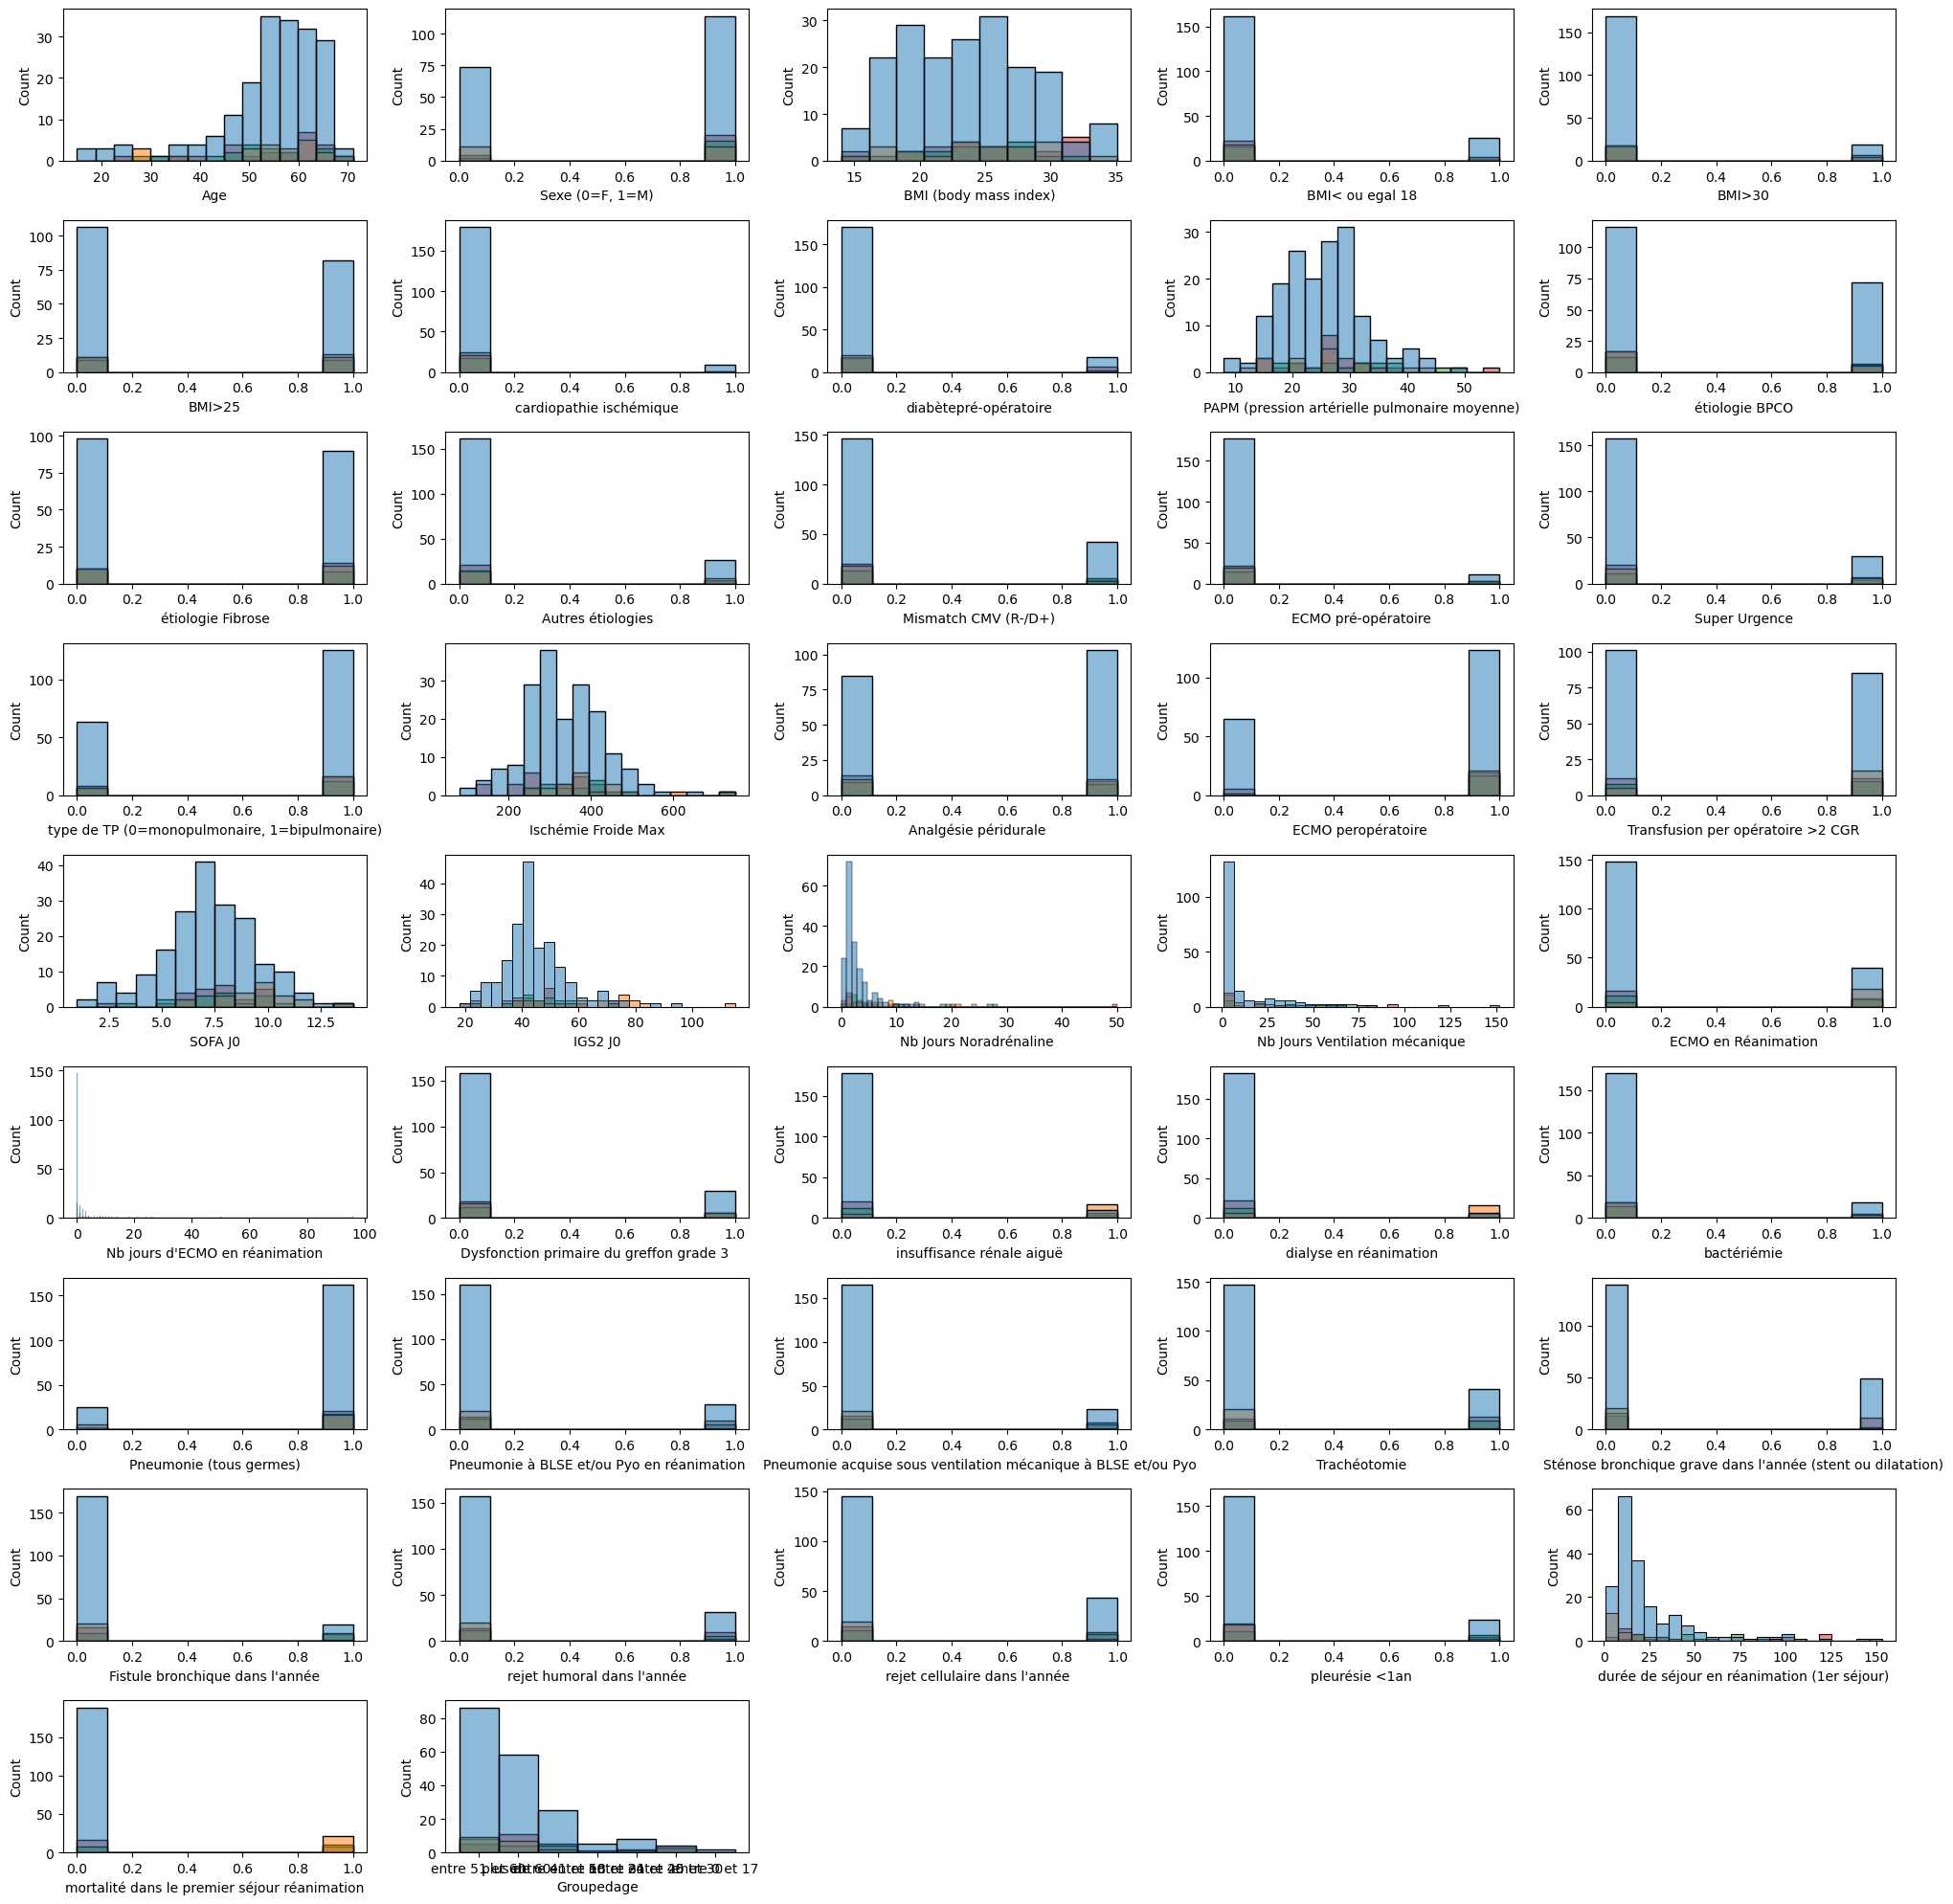

In [57]:
count=1
plt.subplots(figsize=(20, 20))

for i in X.columns:
    plt.subplot(9,5,count)
    sns.histplot(data=pulmonary_imp, hue='target', x = i,palette="tab10").legend([],[], frameon=False)
    count+=1

plt.tight_layout()
plt.show()

- There are some patients who died at reanimation.
- All patients at the age between 26 and 30 died.
All patients having less than 24 years survived

We can inquire about the age and sex of those patients.


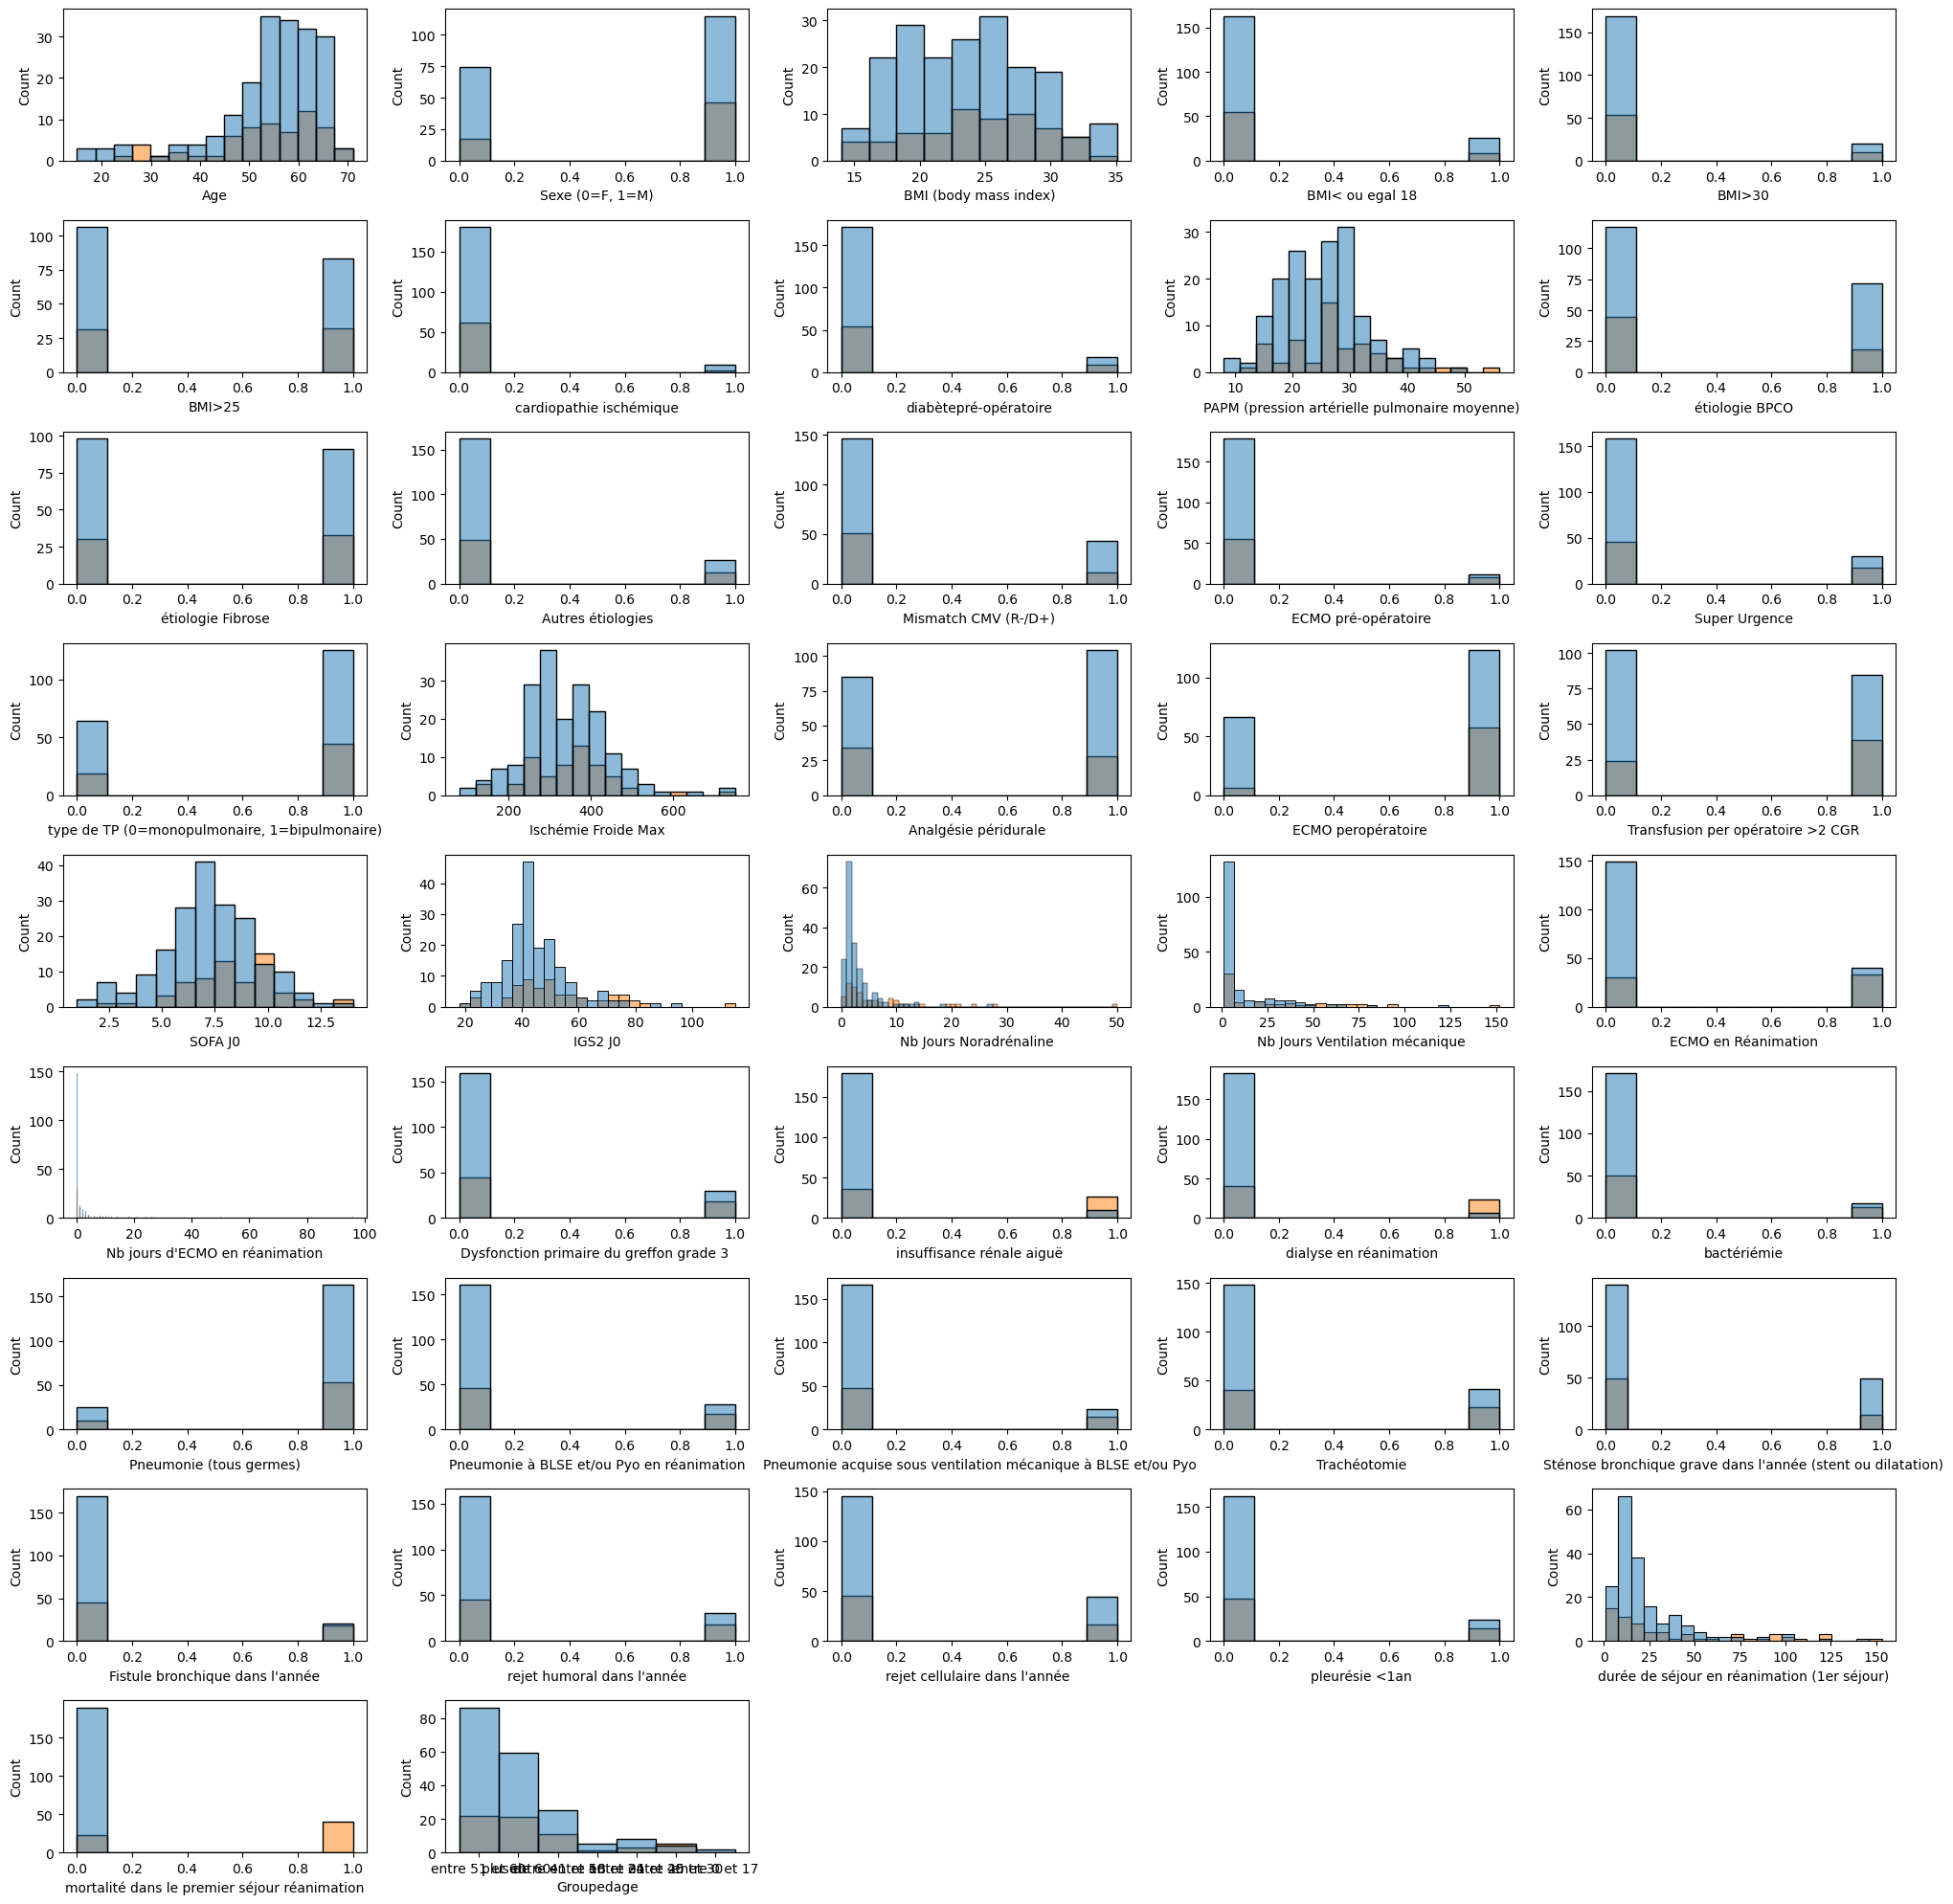

In [58]:
count=1
plt.subplots(figsize=(20, 20))

for i in X.columns:
    plt.subplot(9,5,count)
    sns.histplot(data=pulmonary_imp, hue='mortalité à un an', x = i,palette="tab10").legend([],[], frameon=False)
    count+=1

plt.tight_layout()
plt.show()

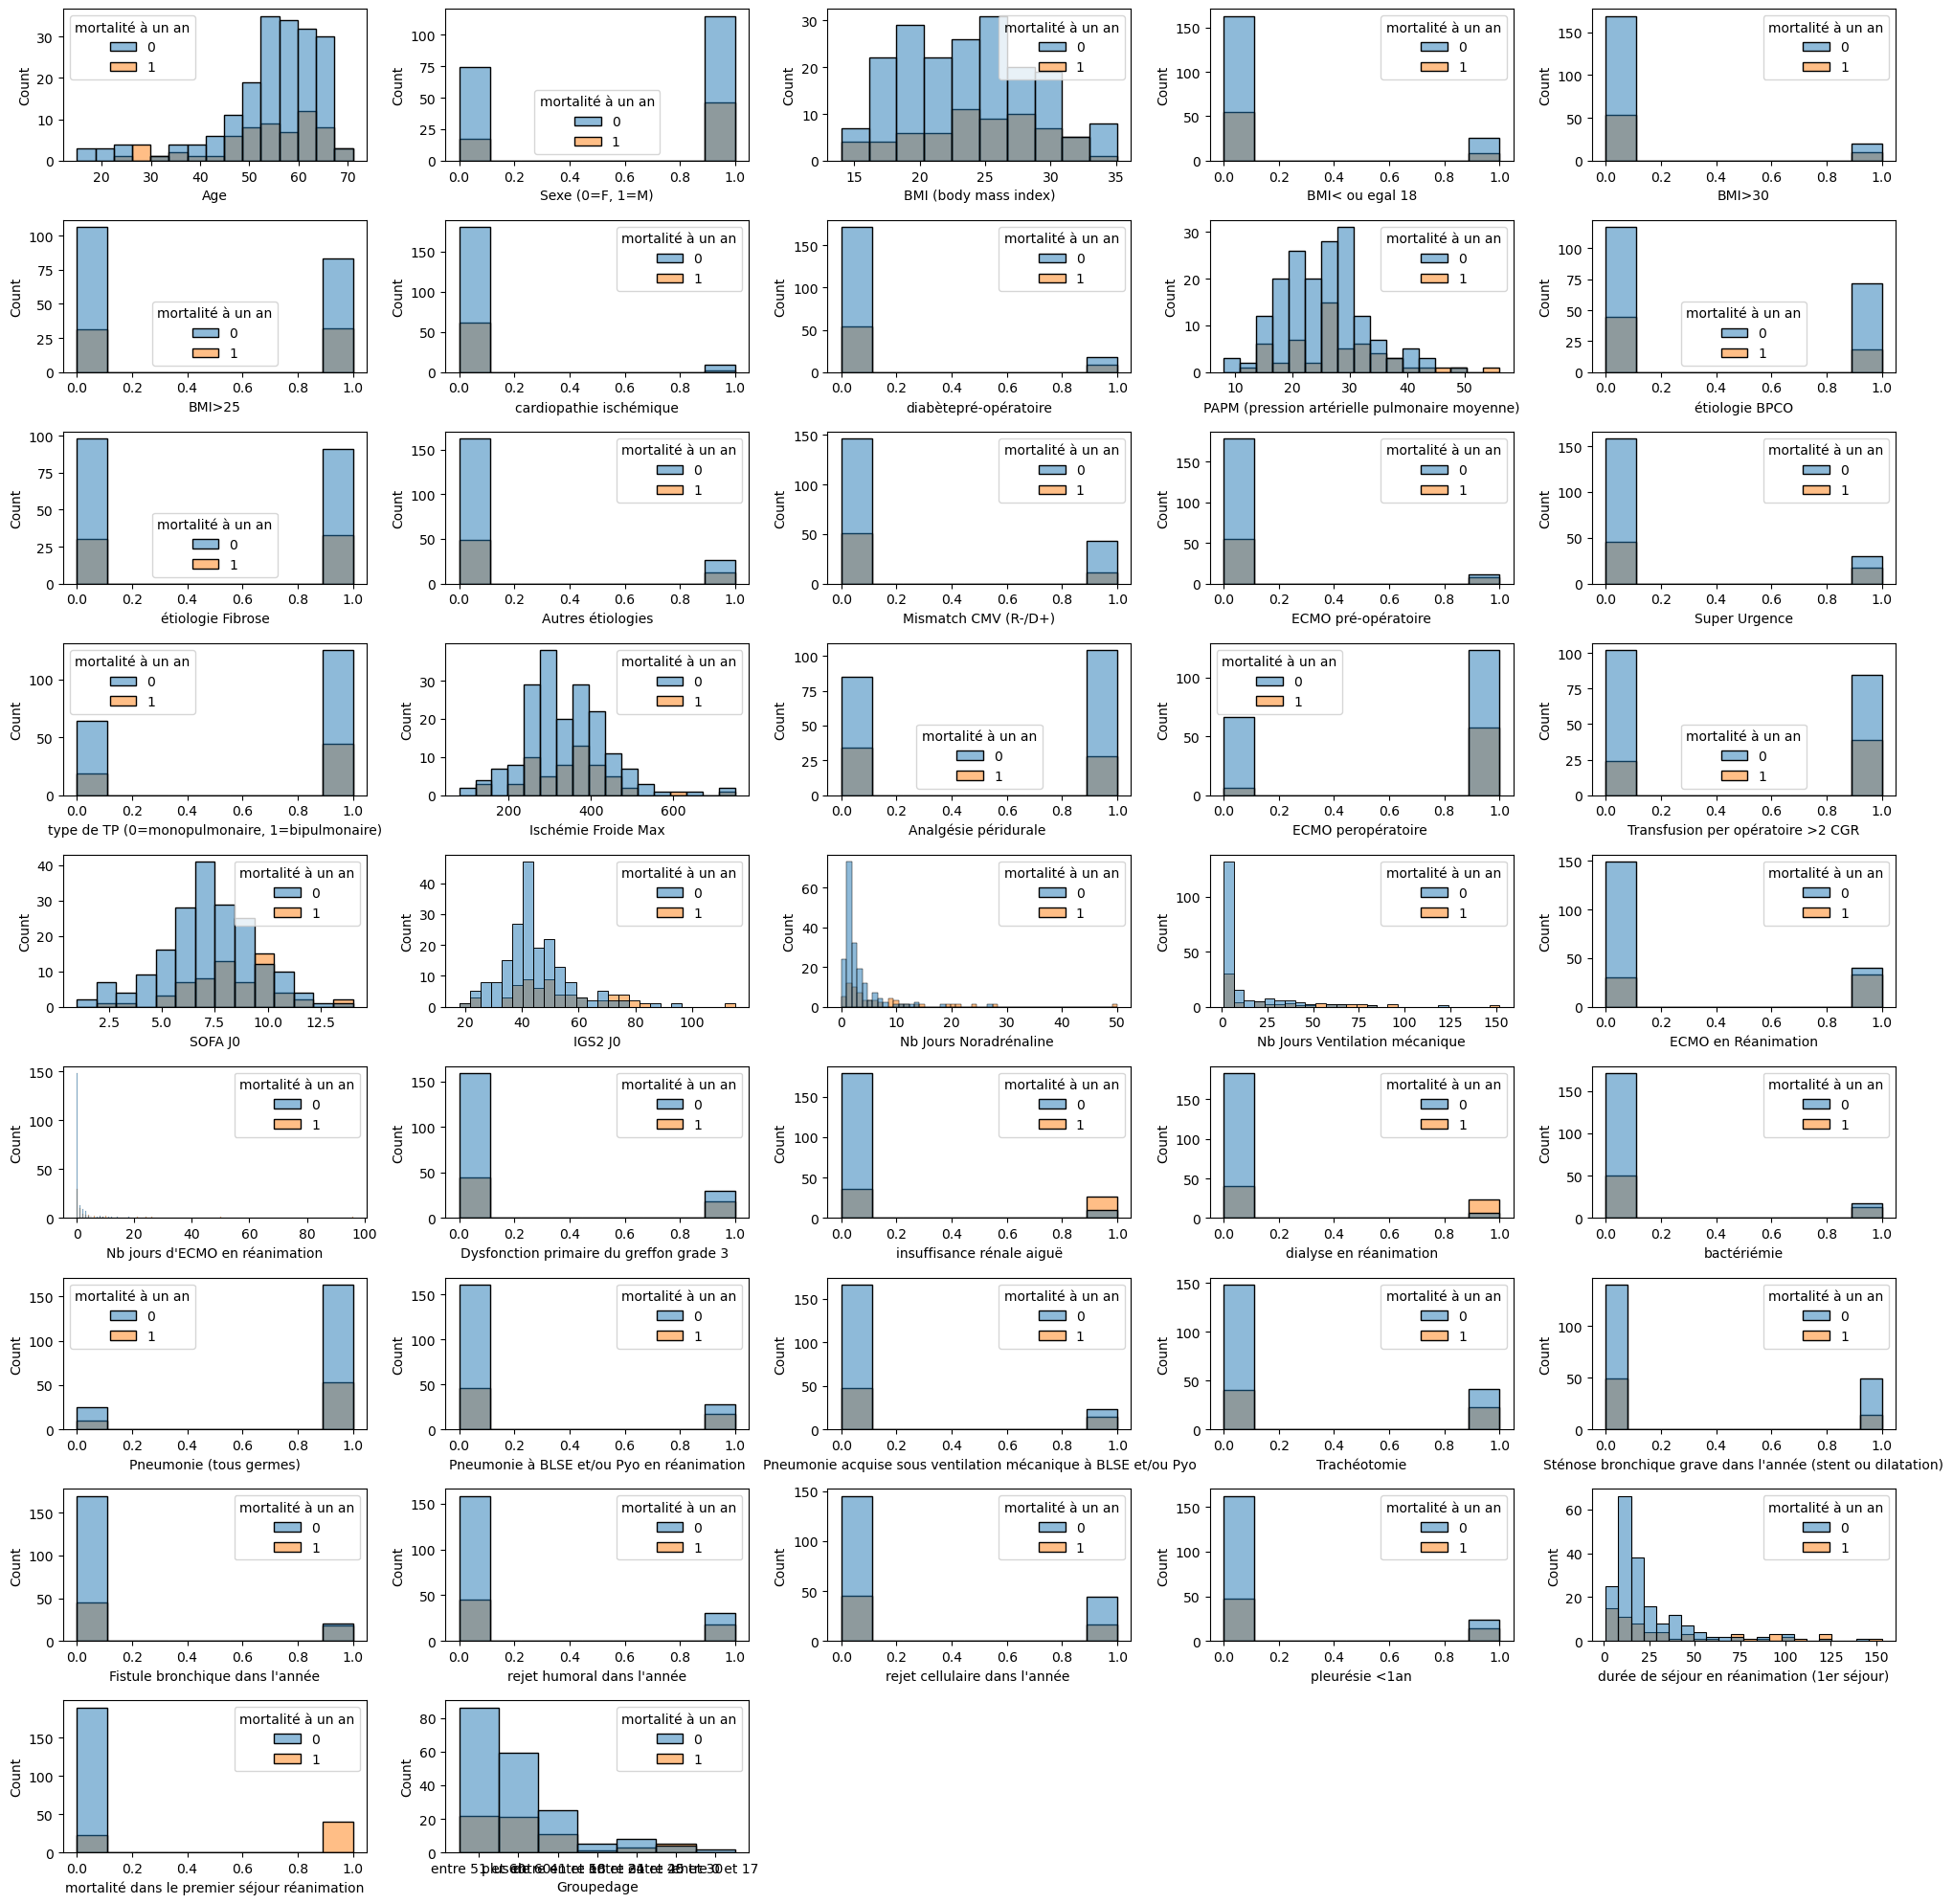

In [59]:
count=1
plt.subplots(figsize=(20, 20))

for i in X.columns:
    plt.subplot(9,5,count)
    sns.histplot(data=pulmonary_imp, hue='mortalité à un an', x = i,palette="tab10")
    count+=1

plt.tight_layout()
plt.show()

- Most of the patients who died were during their first day in the intensive care unit. As the days pass, their chances of survival increase. However, after 40 days, the risk becomes imbalanced, with a 50% chance of adverse outcomes.

- More than 80% of patients who died had bronchial fistula.

- More than 50% of patients who died underwent preoperative ECMO (Extracorporeal Membrane Oxygenation). This means that if you did not undergo preoperative ECMO, your chances of survival are higher than 70%, while if you did undergo it, the chances decrease to 50%.

- The same applies to ECMO during the intensive care unit stay.

- Cardiopathie ischemique: All those who had this at 1 survived, but all those who died had this at 0. But more than 85% of patient had this at 0

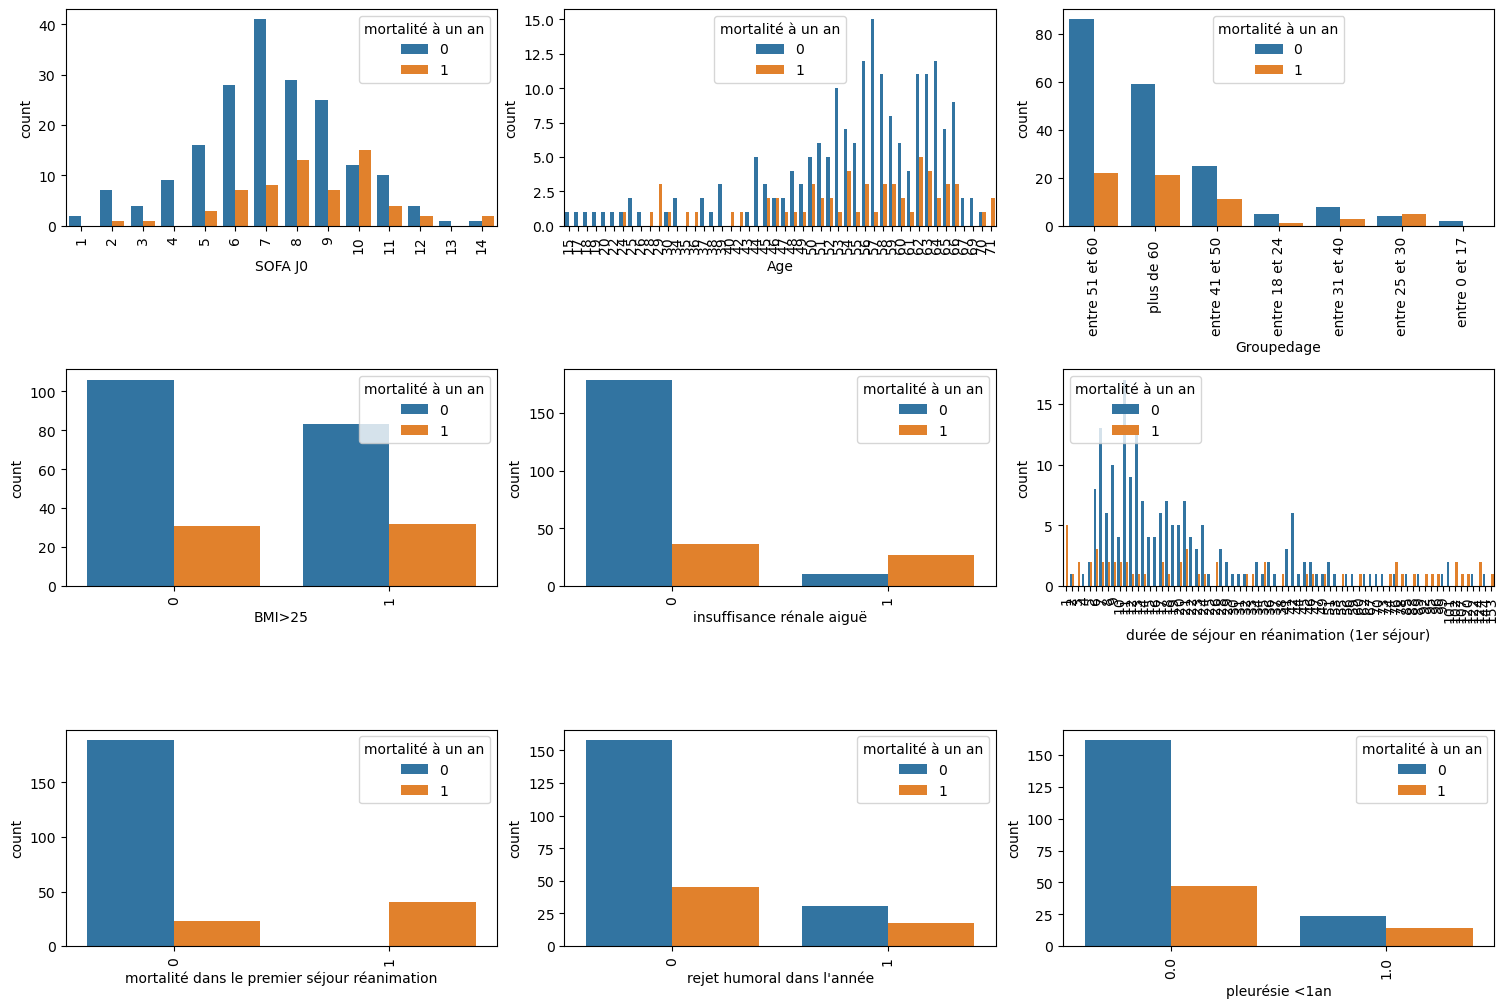

In [60]:
cat_vars = ['SOFA J0','Age', 'Groupedage','BMI>25','insuffisance rénale aiguë','durée de séjour en réanimation (1er séjour)','mortalité dans le premier séjour réanimation','rejet humoral dans l\'année','pleurésie <1an']

# create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='mortalité à un an', data=pulmonary_imp, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

# remove the sixth subplot
#fig.delaxes(axs[6])

# show plot

plt.show()

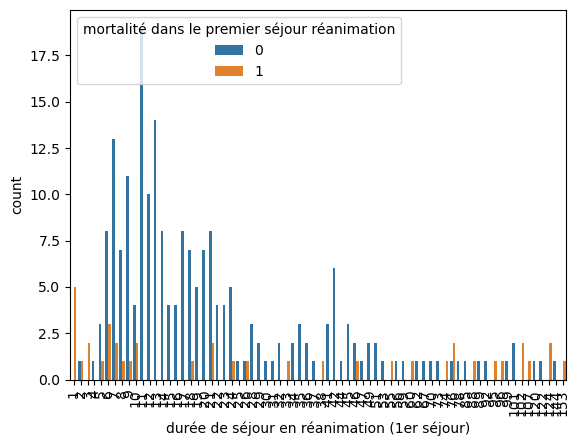

In [61]:
sns.countplot(x="durée de séjour en réanimation (1er séjour)", hue='mortalité dans le premier séjour réanimation', data=pulmonary_imp[["mortalité dans le premier séjour réanimation","durée de séjour en réanimation (1er séjour)"]])
plt.xticks(rotation=90)
plt.show()

In [62]:
X.columns

Index(['Age', 'Sexe (0=F, 1=M)', 'BMI (body mass index)', 'BMI< ou egal 18',
       'BMI>30', 'BMI>25', 'cardiopathie ischémique', 'diabètepré-opératoire',
       'PAPM (pression artérielle pulmonaire moyenne)', 'étiologie BPCO',
       'étiologie Fibrose', 'Autres étiologies', 'Mismatch CMV (R-/D+)',
       'ECMO pré-opératoire', 'Super Urgence',
       'type de TP (0=monopulmonaire, 1=bipulmonaire)', 'Ischémie Froide Max',
       'Analgésie péridurale ', 'ECMO peropératoire ',
       'Transfusion per opératoire >2 CGR', 'SOFA J0', 'IGS2 J0',
       'Nb Jours Noradrénaline ', 'Nb Jours Ventilation mécanique',
       'ECMO en Réanimation', 'Nb jours d'ECMO en réanimation',
       'Dysfonction primaire du greffon grade 3 ', 'insuffisance rénale aiguë',
       'dialyse en réanimation', 'bactériémie', 'Pneumonie (tous germes)',
       'Pneumonie à BLSE et/ou Pyo en réanimation',
       'Pneumonie acquise sous ventilation mécanique à BLSE et/ou Pyo',
       'Trachéotomie',
       'Sténose 

# Box plot

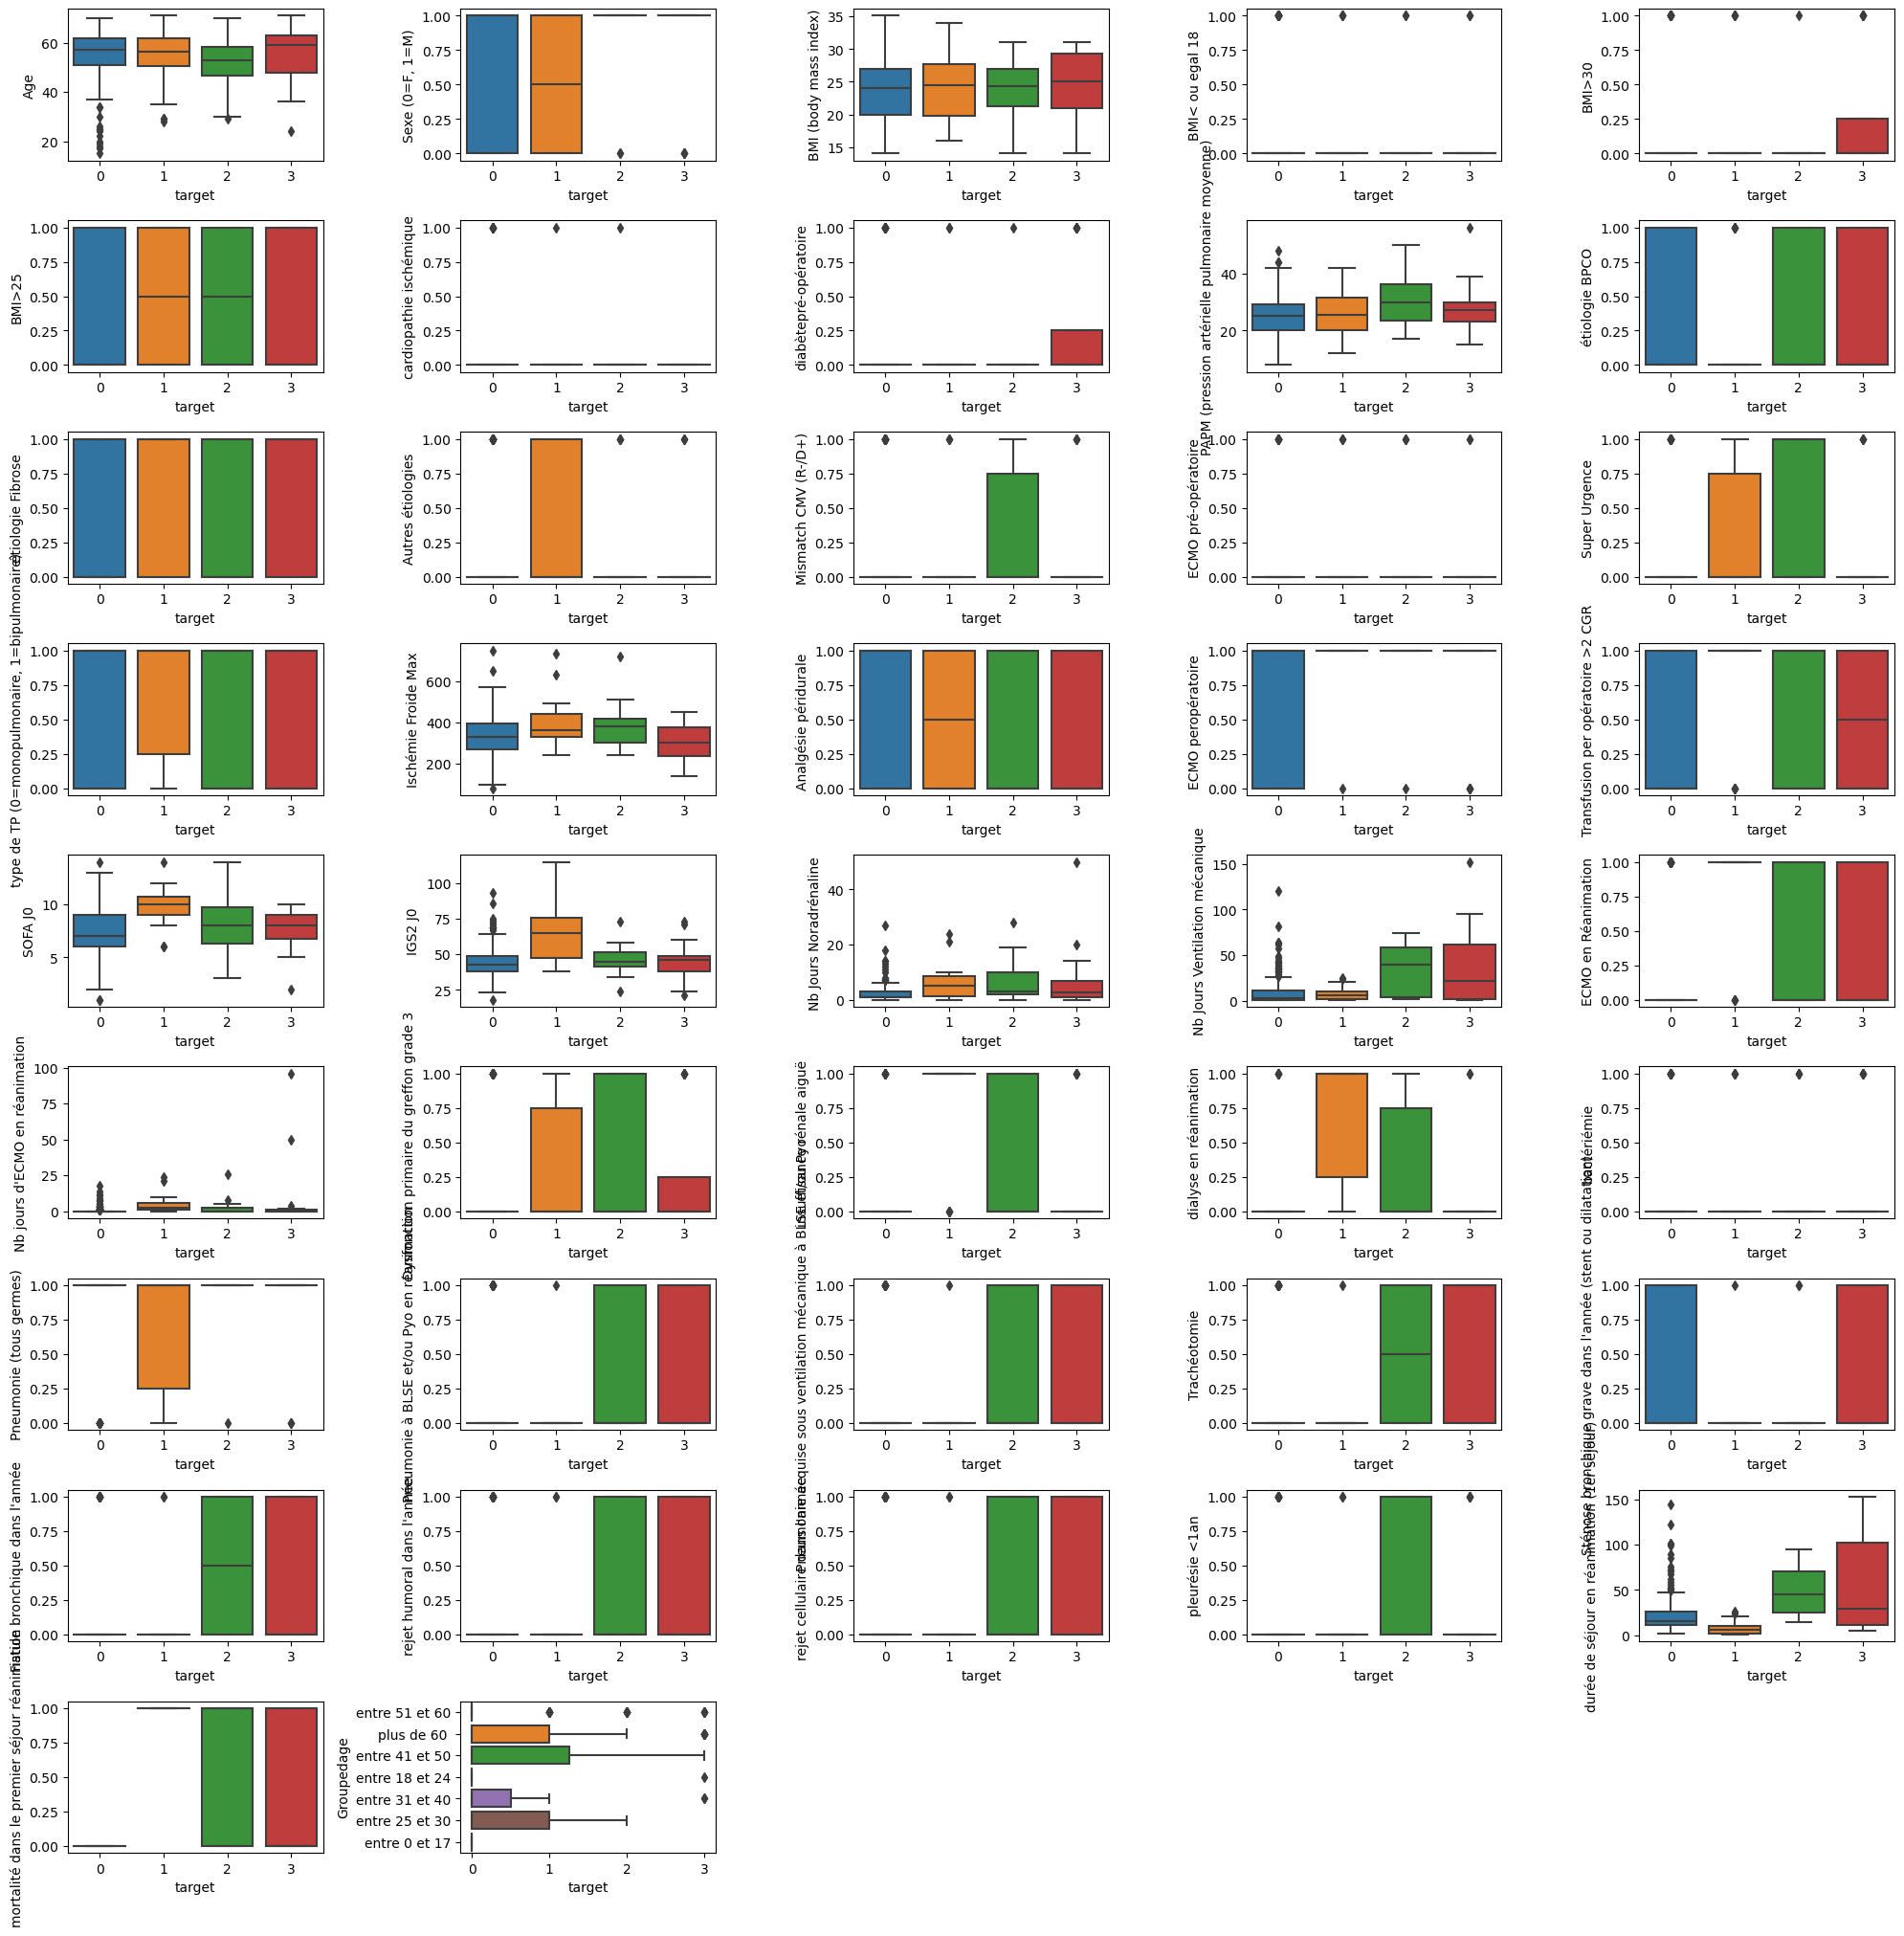

In [63]:
count=1
plt.subplots(figsize=(20, 20))

for i in X.columns:
    plt.subplot(9,5,count)
    sns.boxplot(data=pulmonary_imp, x='target', y = i,palette="tab10")
    count+=1

plt.tight_layout()
plt.show()

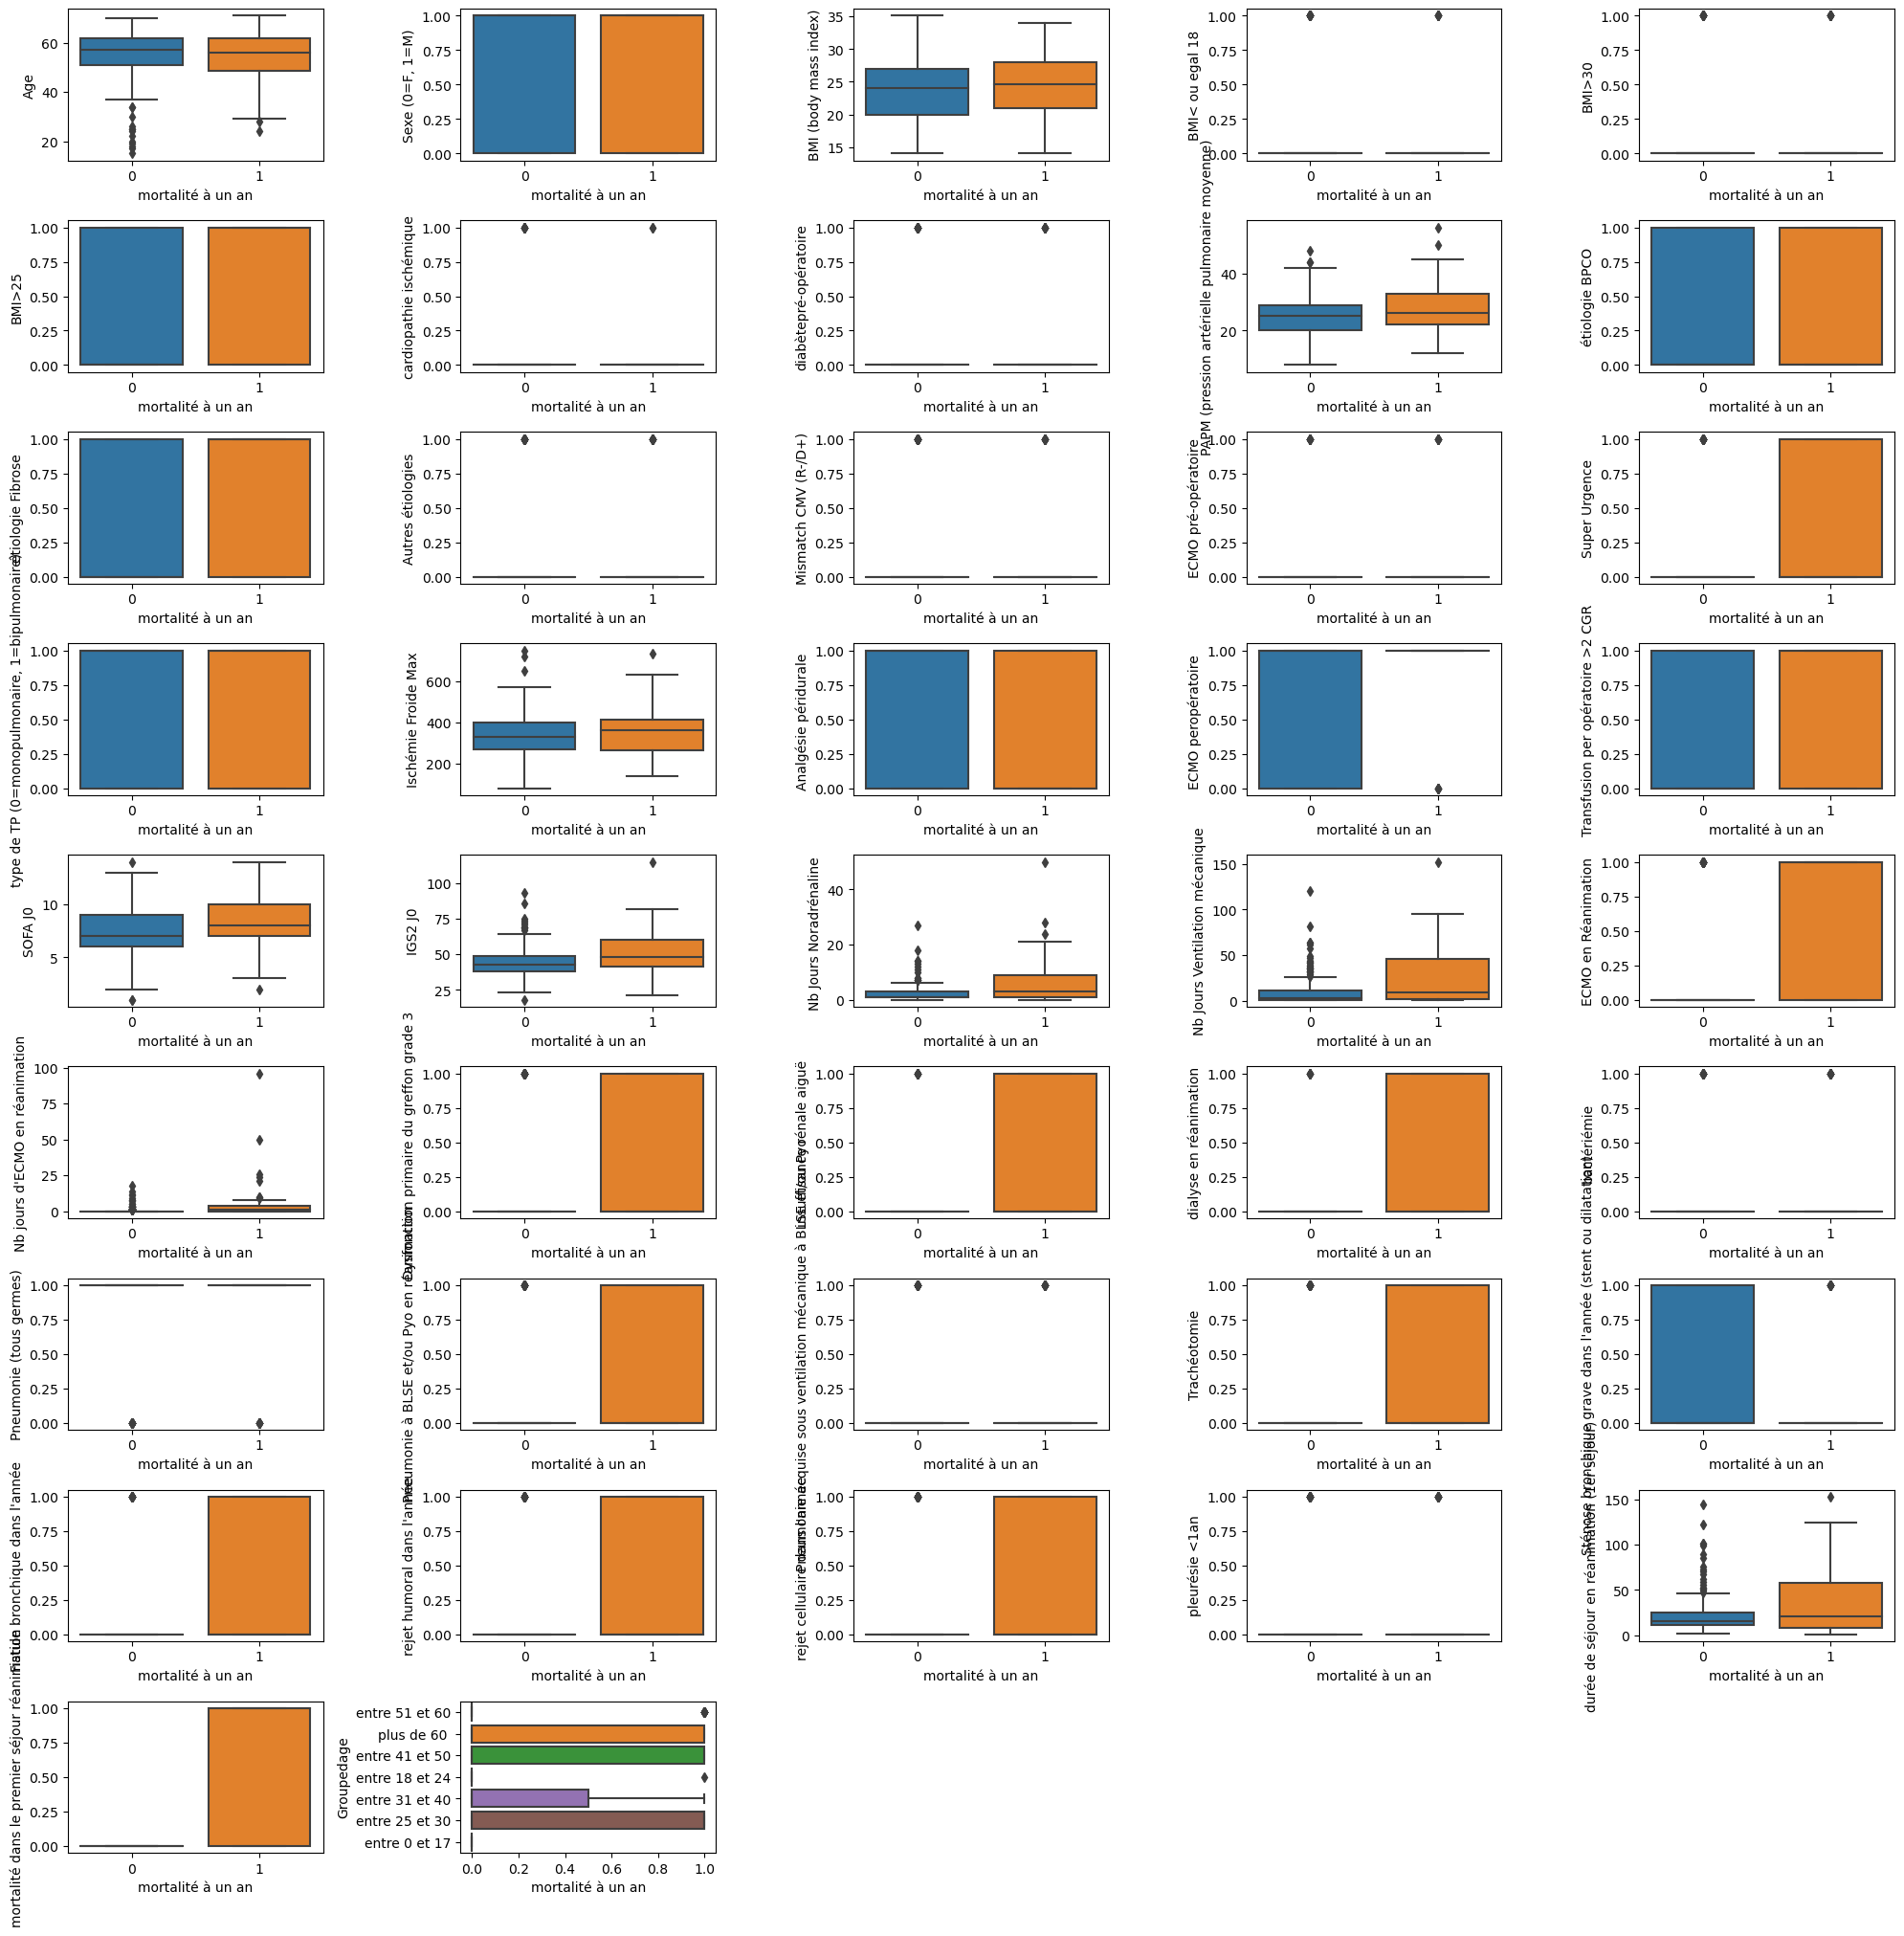

In [64]:
count=1
plt.subplots(figsize=(20, 20))

for i in X.columns:
    plt.subplot(9,5,count)
    sns.boxplot(data=pulmonary_imp, x='mortalité à un an', y = i,palette="tab10")
    count+=1

plt.tight_layout()
plt.show()

We might have some outliers from the boxpolts

# Data Cleaning

In [65]:
nulldata = pulmonary_imp[pulmonary_imp.isnull().any(axis=1)]

In [66]:
nulldata.shape

(44, 46)

In [67]:
def null_data_background(cell_value):

    highlight = 'background-color: darkorange;'
    default = ''

    if pd.isna(cell_value):
        return highlight
    return default

In [68]:
nulldata[['Sexe (0=F, 1=M)','Analgésie péridurale ']]

Sexe (0=F, 1=M)  Analgésie péridurale 
0                  0                    0.0
2                  1                    1.0
17                 1                    1.0
20                 0                    1.0
37                 1                    NaN
38                 0                    1.0
44                 1                    0.0
48                 0                    1.0
53                 1                    1.0
57                 0                    0.0
66                 1                    0.0
67                 1                    1.0
69                 1                    0.0
86                 1                    1.0
87                 0                    0.0
92                 1                    1.0
93                 1                    1.0
99                 0                    0.0
106                1                    1.0
110                1                    1.0
111                1                    1.0
113                0                    0.0
122                1                    0.0
123                1                    1.0
132                0                    1.0
139                1                    0.0
143                0                    0.0
149                1                    0.0
151                1                    1.0
153                1                    1.0
154                1                    0.0
157                1                    0.0
162                0                    0.0
169                1                    0.0
175                1                    0.0
193                1                    1.0
197                0                    1.0
201                0                    1.0
205                1                    0.0
209                0                    0.0
218                0                    0.0
226                0                    0.0
232                1                    0.0
250                1                    0.0

In [69]:
pulmonary_imp.columns[pulmonary_imp.isnull().any()]

Index(['PAPM (pression artérielle pulmonaire moyenne)', 'Autres étiologies',
       'Mismatch CMV (R-/D+)', 'Super Urgence', 'Ischémie Froide Max',
       'Analgésie péridurale ', 'Transfusion per opératoire >2 CGR',
       'Nb Jours Noradrénaline ', 'Pneumonie (tous germes)',
       'rejet cellulaire dans l'année ', 'pleurésie <1an'],
      dtype='object')

In [70]:
#Coloring nan cells
nulldata.style.applymap(null_data_background)

In [71]:
# Select the columns with missing values that you want to impute
null_columns = nulldata.columns[nulldata.isnull().any()].to_numpy()

In [72]:
null_columns = ['PAPM (pression artérielle pulmonaire moyenne)',
       'Autres étiologies', 'Mismatch CMV (R-/D+)', 'Super Urgence',
       'Ischémie Froide Max', 'Analgésie péridurale ',
       'Transfusion per opératoire >2 CGR', 'Nb Jours Noradrénaline ',
       'Pneumonie (tous germes)', "rejet cellulaire dans l'année ",
       'pleurésie <1an']

# Managing null values

In [73]:
#MULTIINTERPOLATION

# Create an IterativeImputer object
imputer = IterativeImputer(max_iter=10, random_state=0)  # Adjust max_iter if needed

# Fit and transform the imputer on your DataFrame
imputed_data = imputer.fit_transform(pulmonary_imp[null_columns])

# Convert the imputed data back to a DataFrame
df_imputed = pd.DataFrame(imputed_data, columns=null_columns)
#print(df_imputed)
# Combine the imputed columns with the original DataFrame
df_imputed = pd.concat([pulmonary_imp.drop(null_columns, axis=1),df_imputed], axis=1)


In [74]:
[df_imputed[col_name].unique() for col_name in df_imputed[null_columns].columns]

[array([25.99891692, 29.        , 25.        , 16.        , 17.        ,
        22.        , 21.        , 12.        , 26.        , 23.        ,
        36.        , 25.43078751, 38.        , 27.        , 14.        ,
        50.        , 10.        , 32.        , 34.        , 20.        ,
        19.        , 15.        , 24.        , 25.71167553, 25.72486131,
        39.        , 28.        , 18.        , 25.7234272 , 33.        ,
        35.        , 25.97217293, 30.        , 26.07614882, 42.        ,
        56.        , 25.45643886, 25.66313546,  8.        , 31.        ,
        44.        , 40.        , 25.81822476, 26.28194706, 37.        ,
        25.45590299, 48.        , 25.63751744, 25.3533268 , 26.0892928 ,
        13.        , 25.50832103, 25.63747979, 25.50796783, 25.41457532,
        11.        , 25.74056277, 26.02475848, 45.        , 25.77859462,
        25.50814282, 41.        ]),
 array([0.        , 1.        , 0.27131608, 0.09614111]),
 array([0.        , 1.        

In [75]:
data = df_imputed.copy()
datas = df_imputed.copy()

In [76]:
nulldata = df_imputed[df_imputed.isnull().any(axis=1)]

In [77]:
nulldata

Empty DataFrame
Columns: [Age, Sexe (0=F, 1=M), BMI (body mass index), BMI< ou egal 18, BMI>30, BMI>25, cardiopathie ischémique, diabètepré-opératoire, étiologie BPCO, étiologie Fibrose, ECMO pré-opératoire, type de TP (0=monopulmonaire, 1=bipulmonaire), ECMO peropératoire , SOFA J0, IGS2 J0, Nb Jours Ventilation mécanique, ECMO en Réanimation, Nb jours d'ECMO en réanimation, Dysfonction primaire du greffon grade 3 , insuffisance rénale aiguë, dialyse en réanimation, bactériémie, Pneumonie à BLSE et/ou Pyo en réanimation, Pneumonie acquise sous ventilation mécanique à BLSE et/ou Pyo, Trachéotomie, Sténose bronchique grave dans l'année (stent ou dilatation), Fistule bronchique dans l'année, rejet humoral dans l'année, durée de séjour en réanimation (1er séjour), mortalité dans le premier séjour réanimation, mortalité à un an, mortalité à 90j, mortalité à J30, target, Groupedage, PAPM (pression artérielle pulmonaire moyenne), Autres étiologies, Mismatch CMV (R-/D+), Super Urgence, Ischémie Froide Max, Analgésie péridurale , Transfusion per opératoire >2 CGR, Nb Jours Noradrénaline , Pneumonie (tous germes), rejet cellulaire dans l'année , pleurésie <1an]
Index: []

[0 rows x 46 columns]

In [78]:
# Defining feature and target set as X and Y respectively
X, Y = df_imputed.drop(['mortalité à J30','mortalité à 90j','mortalité à un an','target'],axis=1), df_imputed[['mortalité à J30','mortalité à 90j','mortalité à un an','target']]

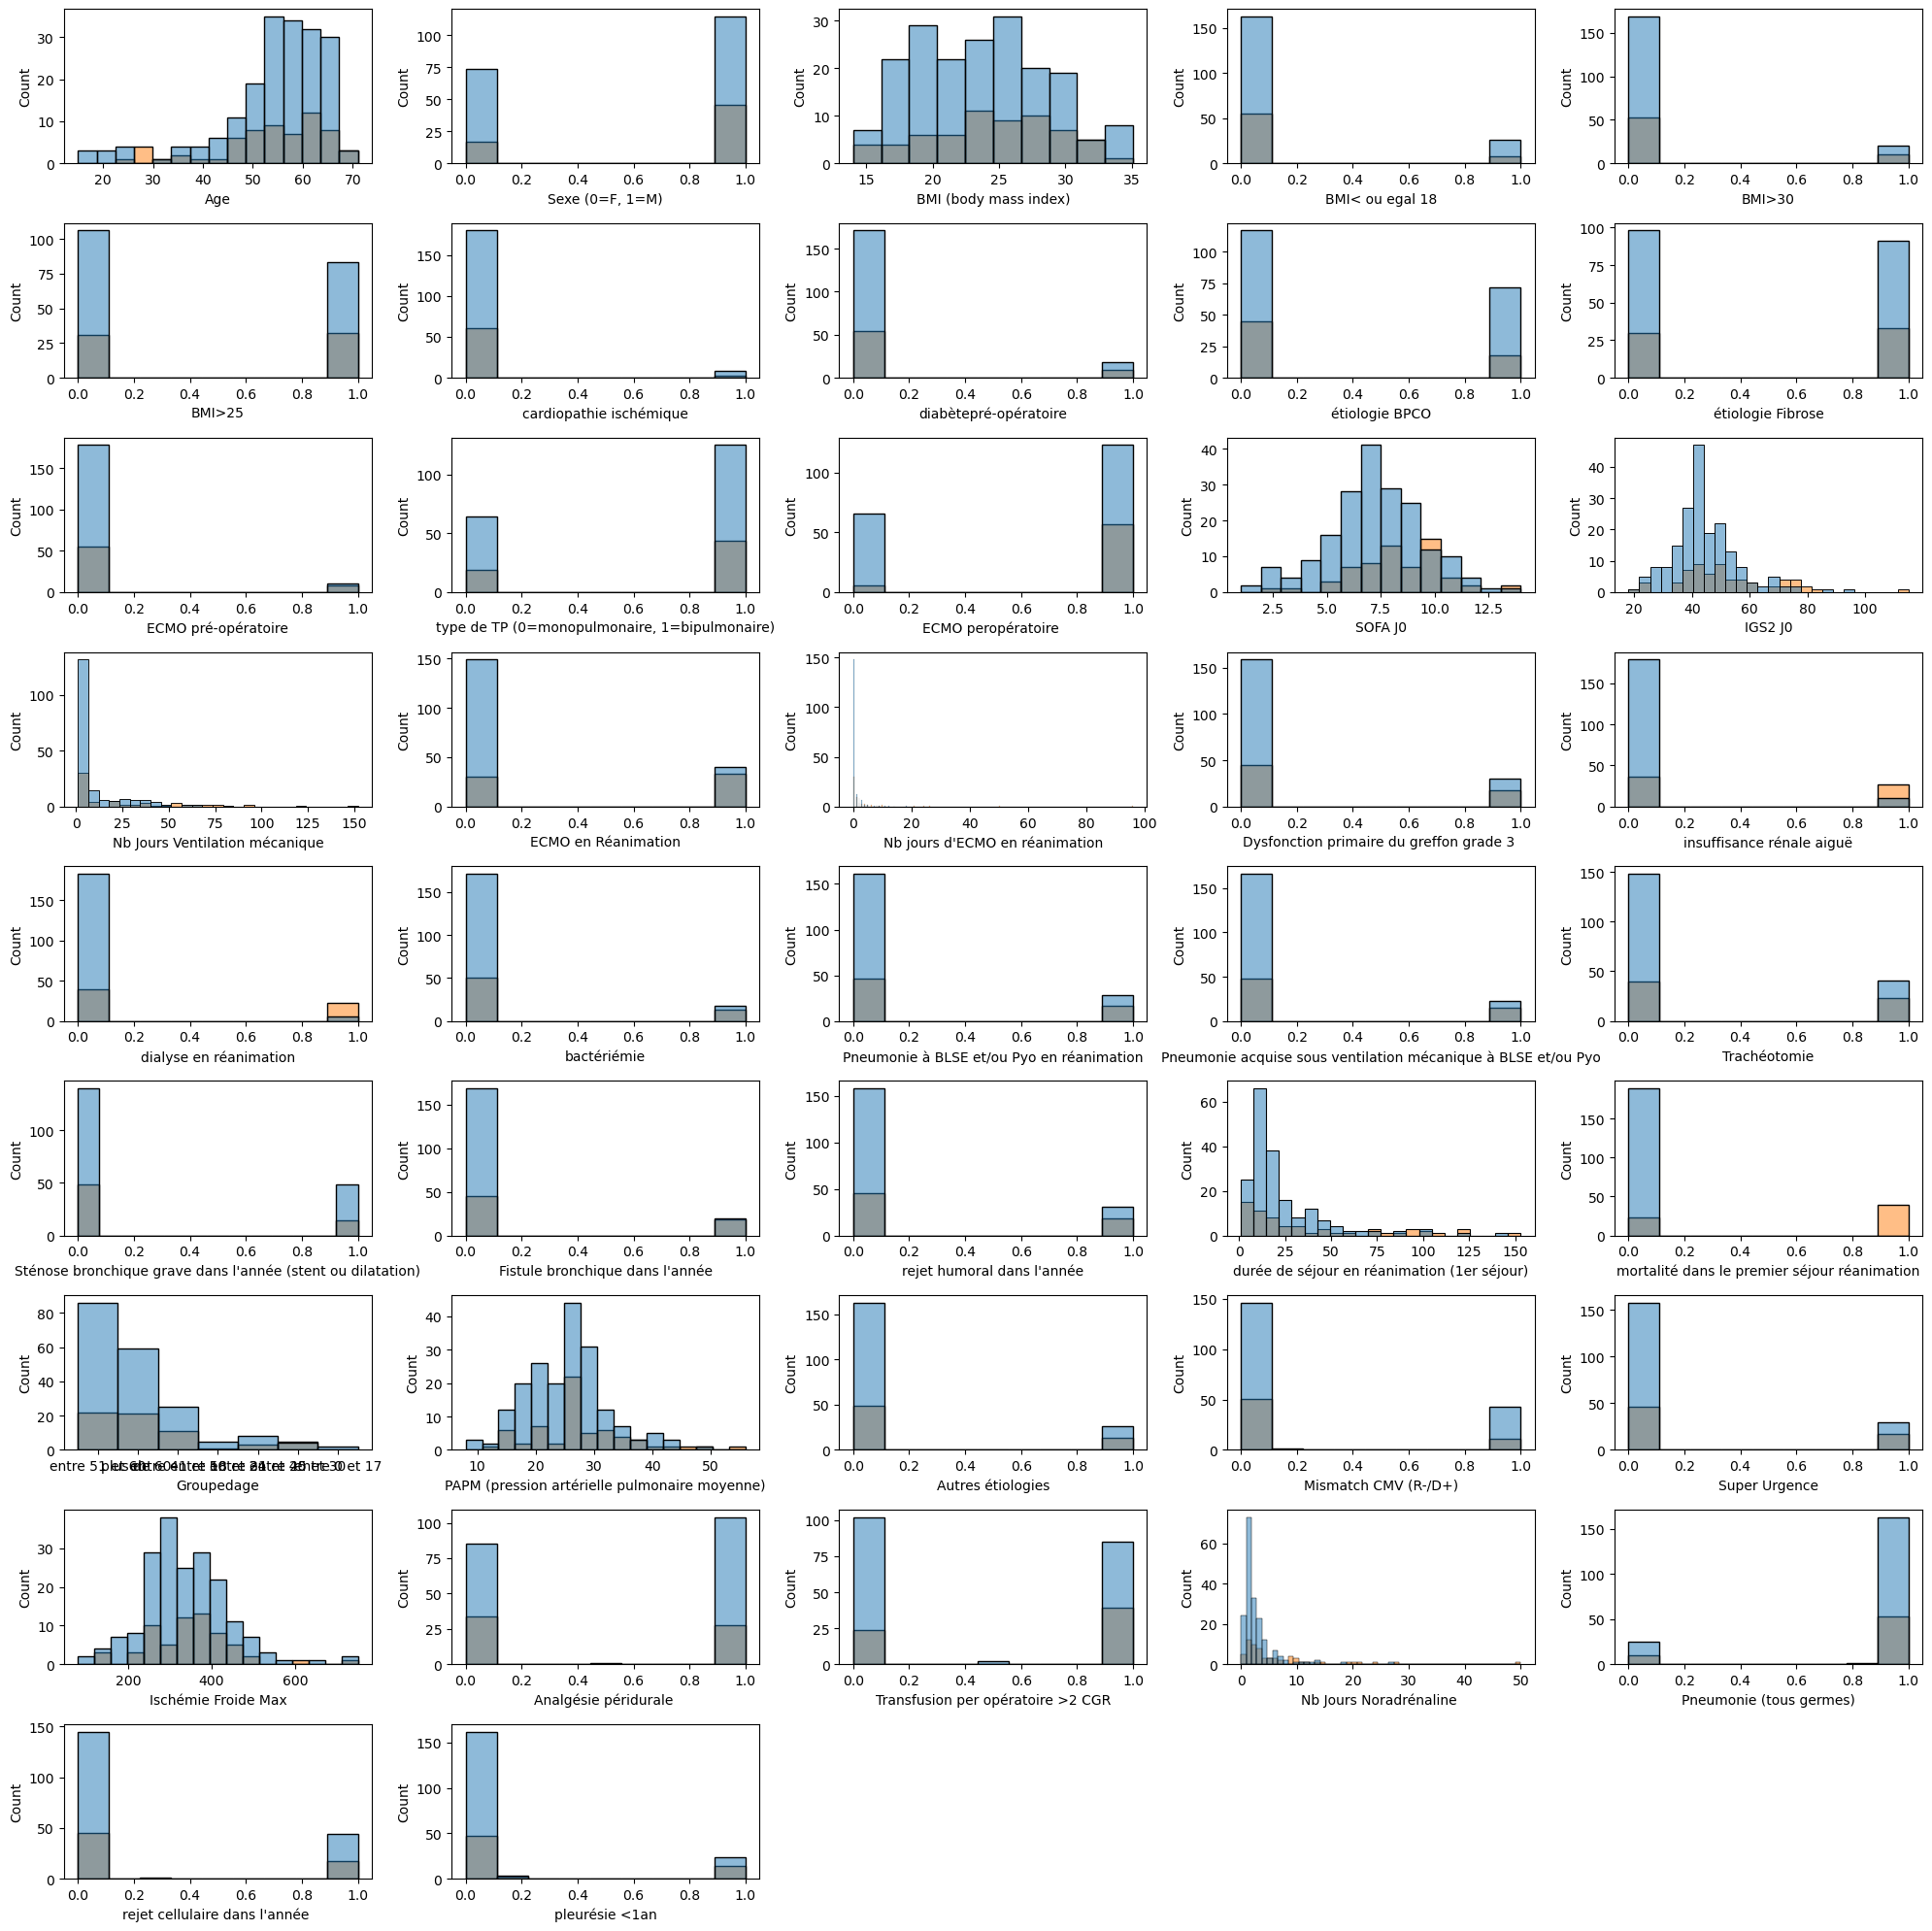

In [79]:
count=1
plt.subplots(figsize=(20, 20))

for i in X.columns:
    plt.subplot(9,5,count)
    sns.histplot(data=data, hue='mortalité à un an', x = i,palette="tab10").legend([],[], frameon=False)
    count+=1

plt.tight_layout()
plt.show()

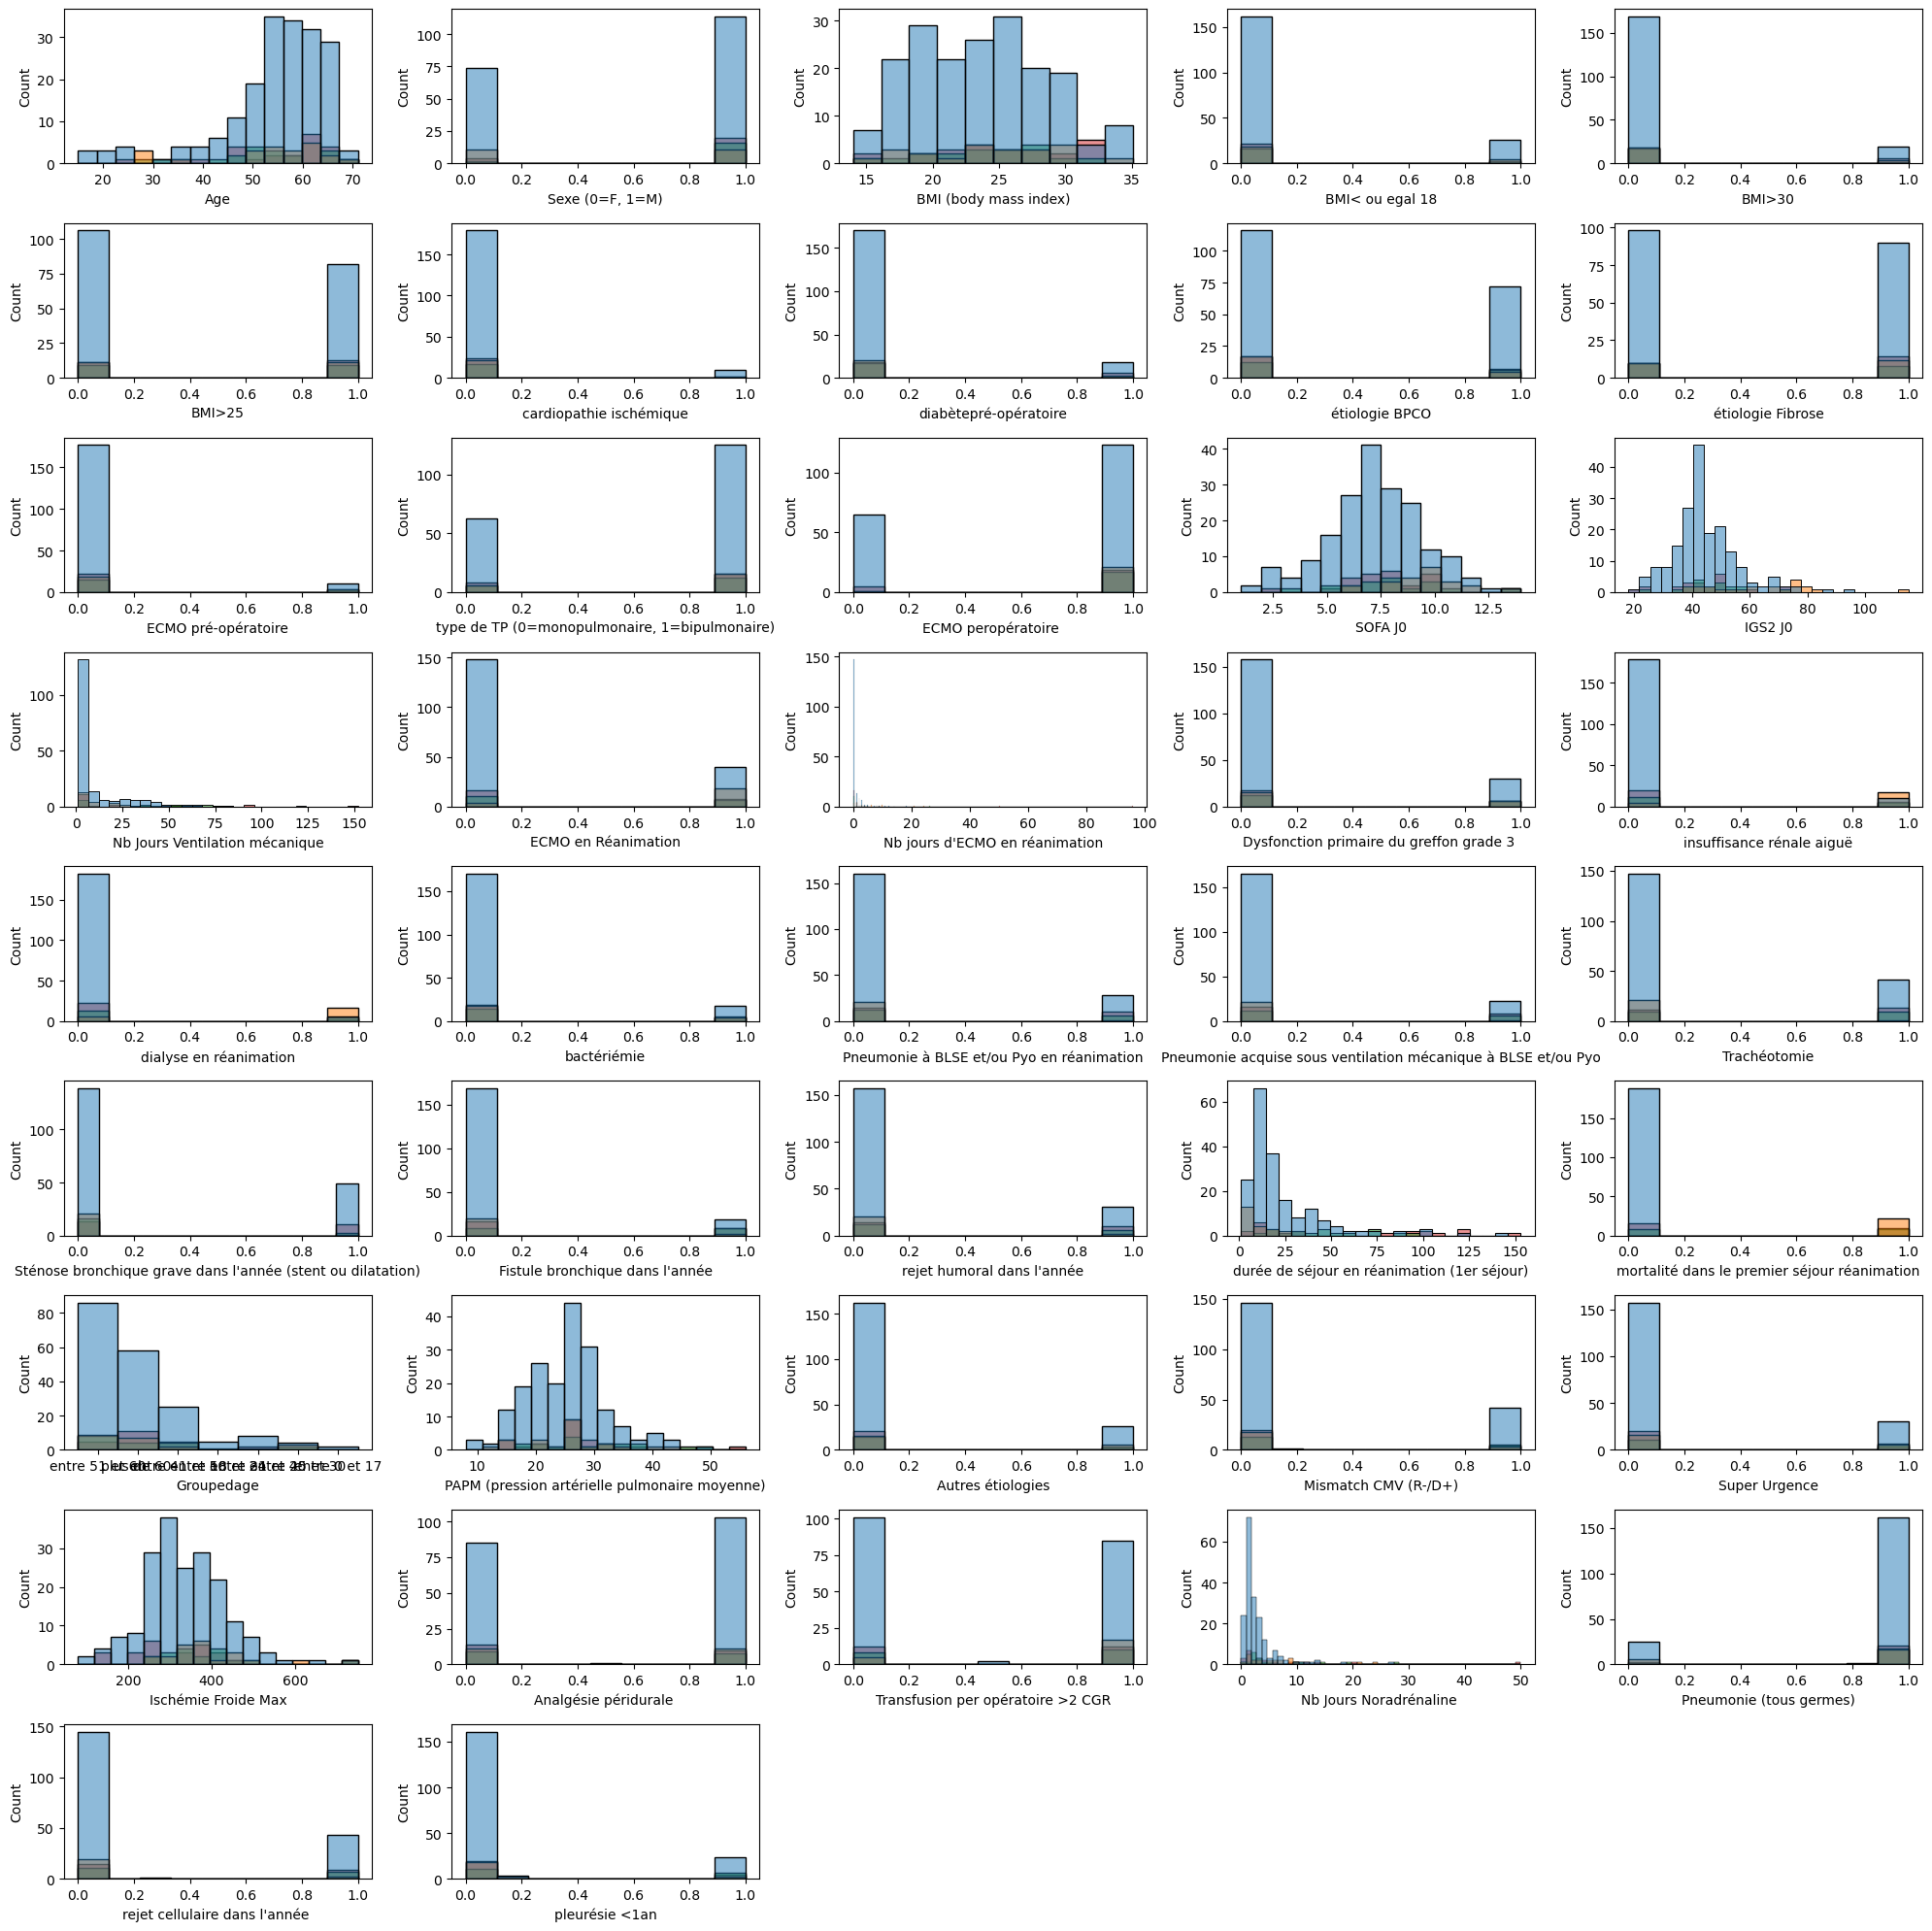

In [80]:
count=1
plt.subplots(figsize=(20, 20))

for i in X.columns:
    plt.subplot(9,5,count)
    sns.histplot(data=data, hue='target', x = i,palette="tab10").legend([],[], frameon=False)
    count+=1

plt.tight_layout()
plt.show()

# Outlier Detection

In [81]:
# Defining feature and target set as X and Y respectively
X, Y = data.drop(['mortalité dans le premier séjour réanimation','mortalité à J30','mortalité à 90j','mortalité à un an','target','Groupedage'],axis=1), data[['mortalité dans le premier séjour réanimation','mortalité à J30','mortalité à 90j','mortalité à un an','target']]

In [82]:
X.reset_index(inplace=True)

Iso = IsolationForest(random_state=7)

Iso.fit(X)
pred_iso = Iso.predict(X)

X['anomaly'] = pred_iso

outliers=X.loc[X['anomaly']==-1]
outlier_index=list(outliers.index)

print(X['anomaly'].value_counts())



 1    174
-1     78
Name: anomaly, dtype: int64


We can observe that 32.94% of values could contain outlier.
I am not going to remove outliers from the data set because it may contain important information for the analysis.

**What will be the performance of our model if outliers where deleted?**

# Normalisation
There are different methods for data normalization, including:

Min-Max Scaling: This method scales the data to a specific range, typically between 0 and 1. It is achieved by subtracting the minimum value of the feature and dividing by the range (maximum value minus the minimum value). The formula is:

X_scaled = (X - X_min) / (X_max - X_min)

Z-Score Normalization: Also known as standardization, this method transforms the data to have a mean of 0 and a standard deviation of 1. It is achieved by subtracting the mean value of the feature and dividing by the standard deviation. The formula is:

X_scaled = (X - X_mean) / X_std

Decimal Scaling: In this method, the data is scaled by dividing it by an appropriate power of 10. The power of 10 is determined based on the maximum absolute value of the feature. The formula is:
X_scaled = X / (10^k)


### We are goin to use Z-score Normalisation

In [83]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

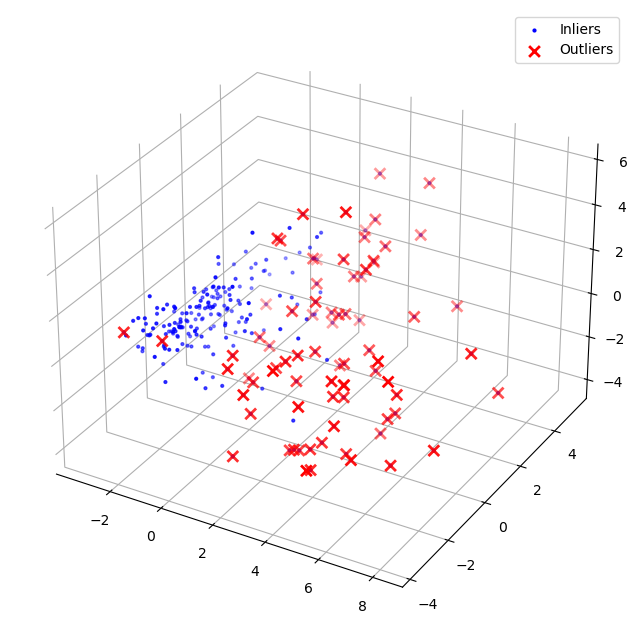

In [84]:
# To represent outliers visually a 3D PCA is needed
pca3 = PCA(n_components=3)

X_reduce = pca3.fit_transform(data_scaled)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Inliers
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="Inliers",c="blue")
# Outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="Outliers")
# Adding Grid
ax.grid(True)
ax.w_xaxis.pane.set_color('w')
ax.w_yaxis.pane.set_color('w')
ax.w_zaxis.pane.set_color('w')
plt.rcParams['grid.color'] = "black"
plt.rcParams['lines.linewidth'] = 1
ax.legend()
plt.show()

# Correlation Matrix

In [85]:
corr = X.corr()
corr

index       Age  \
index                                               1.000000 -0.086886   
Age                                                -0.086886  1.000000   
Sexe (0=F, 1=M)                                     0.018796  0.136911   
BMI (body mass index)                              -0.000712  0.247099   
BMI< ou egal 18                                     0.064347 -0.320164   
BMI>30                                              0.000168  0.009596   
BMI>25                                              0.038824  0.139496   
cardiopathie ischémique                             0.003604  0.094047   
diabètepré-opératoire                               0.014021 -0.064865   
étiologie BPCO                                     -0.019240  0.174468   
étiologie Fibrose                                   0.073542  0.187147   
ECMO pré-opératoire                                -0.023243 -0.216684   
type de TP (0=monopulmonaire, 1=bipulmonaire)      -0.007370 -0.397839   
ECMO peropératoire                                 -0.000845 -0.104783   
SOFA J0                                             0.046340 -0.096307   
IGS2 J0                                            -0.079805  0.099135   
Nb Jours Ventilation mécanique                     -0.007020 -0.058752   
ECMO en Réanimation                                -0.031567 -0.144632   
Nb jours d'ECMO en réanimation                      0.074834 -0.117245   
Dysfonction primaire du greffon grade 3             0.030701 -0.061345   
insuffisance rénale aiguë                          -0.007475 -0.044929   
dialyse en réanimation                             -0.052564 -0.092801   
bactériémie                                        -0.030808 -0.084116   
Pneumonie à BLSE et/ou Pyo en réanimation           0.030836 -0.042431   
Pneumonie acquise sous ventilation mécanique à ...  0.017378 -0.075920   
Trachéotomie                                       -0.024062 -0.148061   
Sténose bronchique grave dans l'année (stent ou...  0.057887  0.002082   
Fistule bronchique dans l'année                    -0.055335  0.101413   
rejet humoral dans l'année                          0.031081 -0.185899   
durée de séjour en réanimation (1er séjour)        -0.021154 -0.059482   
PAPM (pression artérielle pulmonaire moyenne)      -0.019329 -0.037279   
Autres étiologies                                  -0.073411 -0.479485   
Mismatch CMV (R-/D+)                               -0.013600 -0.014553   
Super Urgence                                       0.017196 -0.181992   
Ischémie Froide Max                                -0.017756 -0.134590   
Analgésie péridurale                               -0.036839  0.114496   
Transfusion per opératoire >2 CGR                  -0.100046 -0.250140   
Nb Jours Noradrénaline                              0.098877 -0.063921   
Pneumonie (tous germes)                             0.096441 -0.120550   
rejet cellulaire dans l'année                       0.108473  0.093537   
pleurésie <1an                                      0.015435 -0.011010   
anomaly                                            -0.011446  0.221647   

                                                    Sexe (0=F, 1=M)  \
index                                                      0.018796   
Age                                                        0.136911   
Sexe (0=F, 1=M)                                            1.000000   
BMI (body mass index)                                      0.167448   
BMI< ou egal 18                                           -0.162559   
BMI>30                                                     0.046770   
BMI>25                                                     0.141447   
cardiopathie ischémique                                    0.120183   
diabètepré-opératoire                                      0.046745   
étiologie BPCO                                            -0.094831   
étiologie Fibrose                                          0.178107   
ECMO pré-opératoire 

In [86]:
corr.style.background_gradient(cmap='coolwarm')

In [87]:
#Looking at corrolated variables
dim = len(corr)
tmp_corr = pd.DataFrame(columns=['Index', 'Header','corr'])
i = 1
while i < dim:
  indices = corr.index[i]
  j = 0
  while j < i:
    if corr.iloc[i,j] >= 0.7:
          header = corr.columns[j]
          tmp_corr.loc[len(tmp_corr)] = [indices, header,corr.iloc[i,j]]
    j = j +1
  i = i+1


tmp_corr

Index  \
0                                             BMI>25   
1                             dialyse en réanimation   
2  Pneumonie acquise sous ventilation mécanique à...   
3                                       Trachéotomie   
4        durée de séjour en réanimation (1er séjour)   
5        durée de séjour en réanimation (1er séjour)   

                                      Header      corr  
0                      BMI (body mass index)  0.827542  
1                  insuffisance rénale aiguë  0.869291  
2  Pneumonie à BLSE et/ou Pyo en réanimation  0.903782  
3             Nb Jours Ventilation mécanique  0.762775  
4             Nb Jours Ventilation mécanique  0.890337  
5                               Trachéotomie  0.755318

# Clustering Algorithms

# K-Means

In [88]:
def kmeans_method(df,n_cluster_f):

 fig = plt.figure(figsize=(16,4))
 plt.subplot(1, 2, 1)
 # within-cluster sum of squares (WCSS)
 wcss = []
 for n_cluster in range(1, 20):
    kmeans = KMeans(n_cluster, random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
 plt.plot(range(1, 20), wcss)
 plt.title('The Elbow Method', fontsize = 20)
 plt.xlabel('Number of Clusters')
 plt.ylabel('Within-cluster sum of squares')

 plt.subplot(1, 2, 2)
 kmeans = KMeans(n_cluster_f, random_state = 0)
 ymeans = kmeans.fit(df)

#Get the cluster labels and centroids
 cluster_labels = kmeans.labels_
 centroids = kmeans.cluster_centers_

  #Evaluate the clustering result
 wcss = kmeans.inertia_
 silhouette_avg = silhouette_score(df, cluster_labels)

  # Step 10: Print the results
 print("Cluster Labels:", cluster_labels)
 print("WCSS:", wcss)
 print("Silhouette Score:", silhouette_avg)


 plt.scatter(df['SOFA J0'], df['durée de séjour en réanimation (1er séjour)'], c=kmeans.labels_, cmap="Set1_r", s=25)
 plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
 plt.title("Kmeans Clustering", fontsize=20)
 plt.xlabel('SOFA J0')
 plt.ylabel('durée de séjour en réanimation (1er séjour)')
 return kmeans.labels_

In [89]:
#convert scaled data to dataframe
df = pd.DataFrame(data_scaled, columns=X.columns)

In [90]:
df.columns

Index(['index', 'Age', 'Sexe (0=F, 1=M)', 'BMI (body mass index)',
       'BMI< ou egal 18', 'BMI>30', 'BMI>25', 'cardiopathie ischémique',
       'diabètepré-opératoire', 'étiologie BPCO', 'étiologie Fibrose',
       'ECMO pré-opératoire', 'type de TP (0=monopulmonaire, 1=bipulmonaire)',
       'ECMO peropératoire ', 'SOFA J0', 'IGS2 J0',
       'Nb Jours Ventilation mécanique', 'ECMO en Réanimation',
       'Nb jours d'ECMO en réanimation',
       'Dysfonction primaire du greffon grade 3 ', 'insuffisance rénale aiguë',
       'dialyse en réanimation', 'bactériémie',
       'Pneumonie à BLSE et/ou Pyo en réanimation',
       'Pneumonie acquise sous ventilation mécanique à BLSE et/ou Pyo',
       'Trachéotomie',
       'Sténose bronchique grave dans l'année (stent ou dilatation)',
       'Fistule bronchique dans l'année', 'rejet humoral dans l'année',
       'durée de séjour en réanimation (1er séjour)',
       'PAPM (pression artérielle pulmonaire moyenne)', 'Autres étiologies',
     

In [91]:
df.drop(['index', 'anomaly'],axis=1,inplace=True)

Cluster Labels: [1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1
 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0
 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0]
WCSS: 9000.94469383901
Silhouette Score: 0.1570318502368284


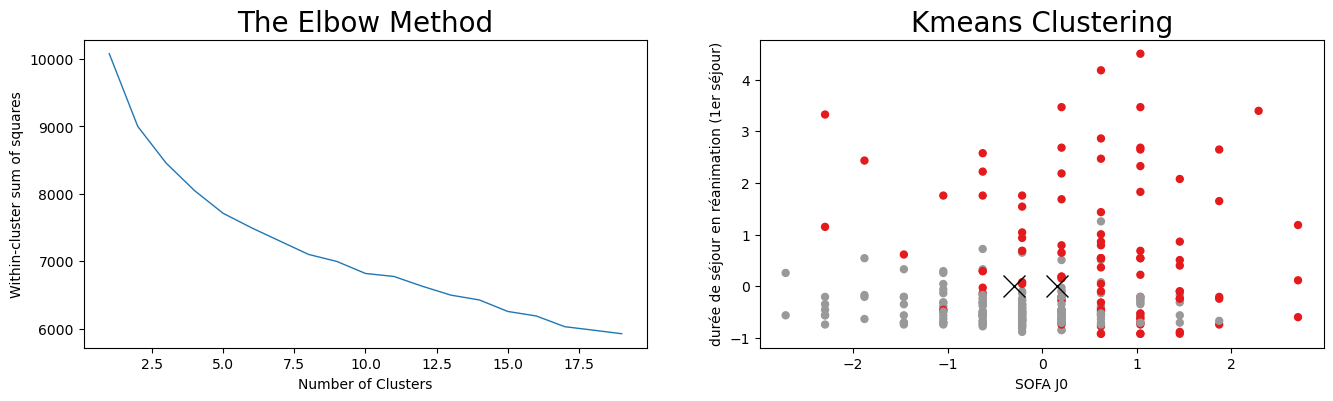

In [92]:
result = kmeans_method(df,2)

In [93]:
tmp = pd.DataFrame([result,Y.target.to_numpy()])
tmp = tmp.transpose()

In [94]:
tmp.columns = ["kmeans","target"]

In [95]:
tmp[tmp.target== 0]

kmeans  target
0         1       0
1         0       0
2         0       0
3         1       0
4         0       0
..      ...     ...
247       0       0
248       0       0
249       0       0
250       0       0
251       0       0

[188 rows x 2 columns]

## Result of kmeans

The elbow method is not very efficient to determine the number of clusters. So I used the silhoute score the more interessing and it was when k=2


A silhouette score of 0.15754628530218398 for a K-means clustering result indicates a moderate level of separation and coherence among the clusters. The silhouette score is a metric used to evaluate the quality of clustering results, ranging from -1 to 1.

A silhouette score closer to 1 suggests well-separated clusters with distinct boundaries, where the data points within each cluster are more similar to each other than to data points in other clusters. On the other hand, a score closer to -1 indicates overlapping or incorrectly assigned clusters.

A silhouette score of approximately 0.15754628530218398 suggests that there is a moderate level of separation and coherence among the clusters. It indicates that the clustering result has some degree of structure, with data points in each cluster being relatively more similar to each other than to data points in other clusters. While the clusters may not be perfectly separated, the score suggests that they still exhibit reasonable cohesion and distinctness.

In [96]:
tmp = pd.DataFrame()

In [97]:
def dbscanAlgo(u,epsilon,min_samples):

  dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
  clusters = dbscan.fit_predict(u)

  # Get cluster labels and core sample indices
  cluster_labels = dbscan.labels_
  core_samples_mask = np.zeros_like(cluster_labels, dtype=bool)
  core_samples_mask[dbscan.core_sample_indices_] = True

  # Number of clusters in labels, ignoring noise if present
  n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
  n_noise = list(cluster_labels).count(-1)

  # Print the number of clusters and noise points
  print("Estimated number of clusters:", n_clusters)
  print("Estimated number of noise points:", n_noise)

  # Plot the clustering result
  plt.scatter(u[:, 0], u[:, 1], c=cluster_labels)
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('DBSCAN Clustering Result')
  plt.show()


Estimated number of clusters: 0
Estimated number of noise points: 252


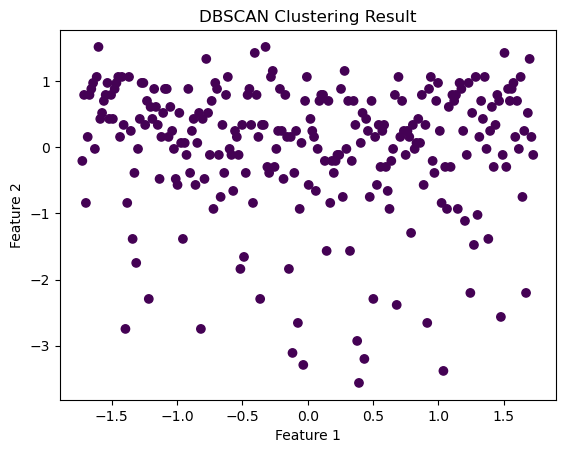

In [98]:
epsilon = 0.3
min_samples = 5
dbscanAlgo(data_scaled,epsilon=epsilon,min_samples=min_samples)

In [99]:
def kmeans_method(df,n_cluster_f):

 fig = plt.figure(figsize=(20,20))
 fig.subplots_adjust(hspace=1, wspace=1)
 length = len(X.columns)
 kmeans = KMeans(n_cluster_f, random_state = 0)
 ymeans = kmeans.fit(df)
 col = X.columns
 k=1
 for i in range(2,11):
    j = i + 1
    while j < 12:
        plt.subplot(9, 5, k)

        plt.scatter(df[col[i]], df[col[j]], c=kmeans.labels_, cmap="Set1_r", s=25)
        plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
        #plt.title(col[i] + col[j], fontsize=20)
        plt.xlabel(col[i])
        plt.ylabel(col[j])
        j = j+1
        k = k + 1

 return

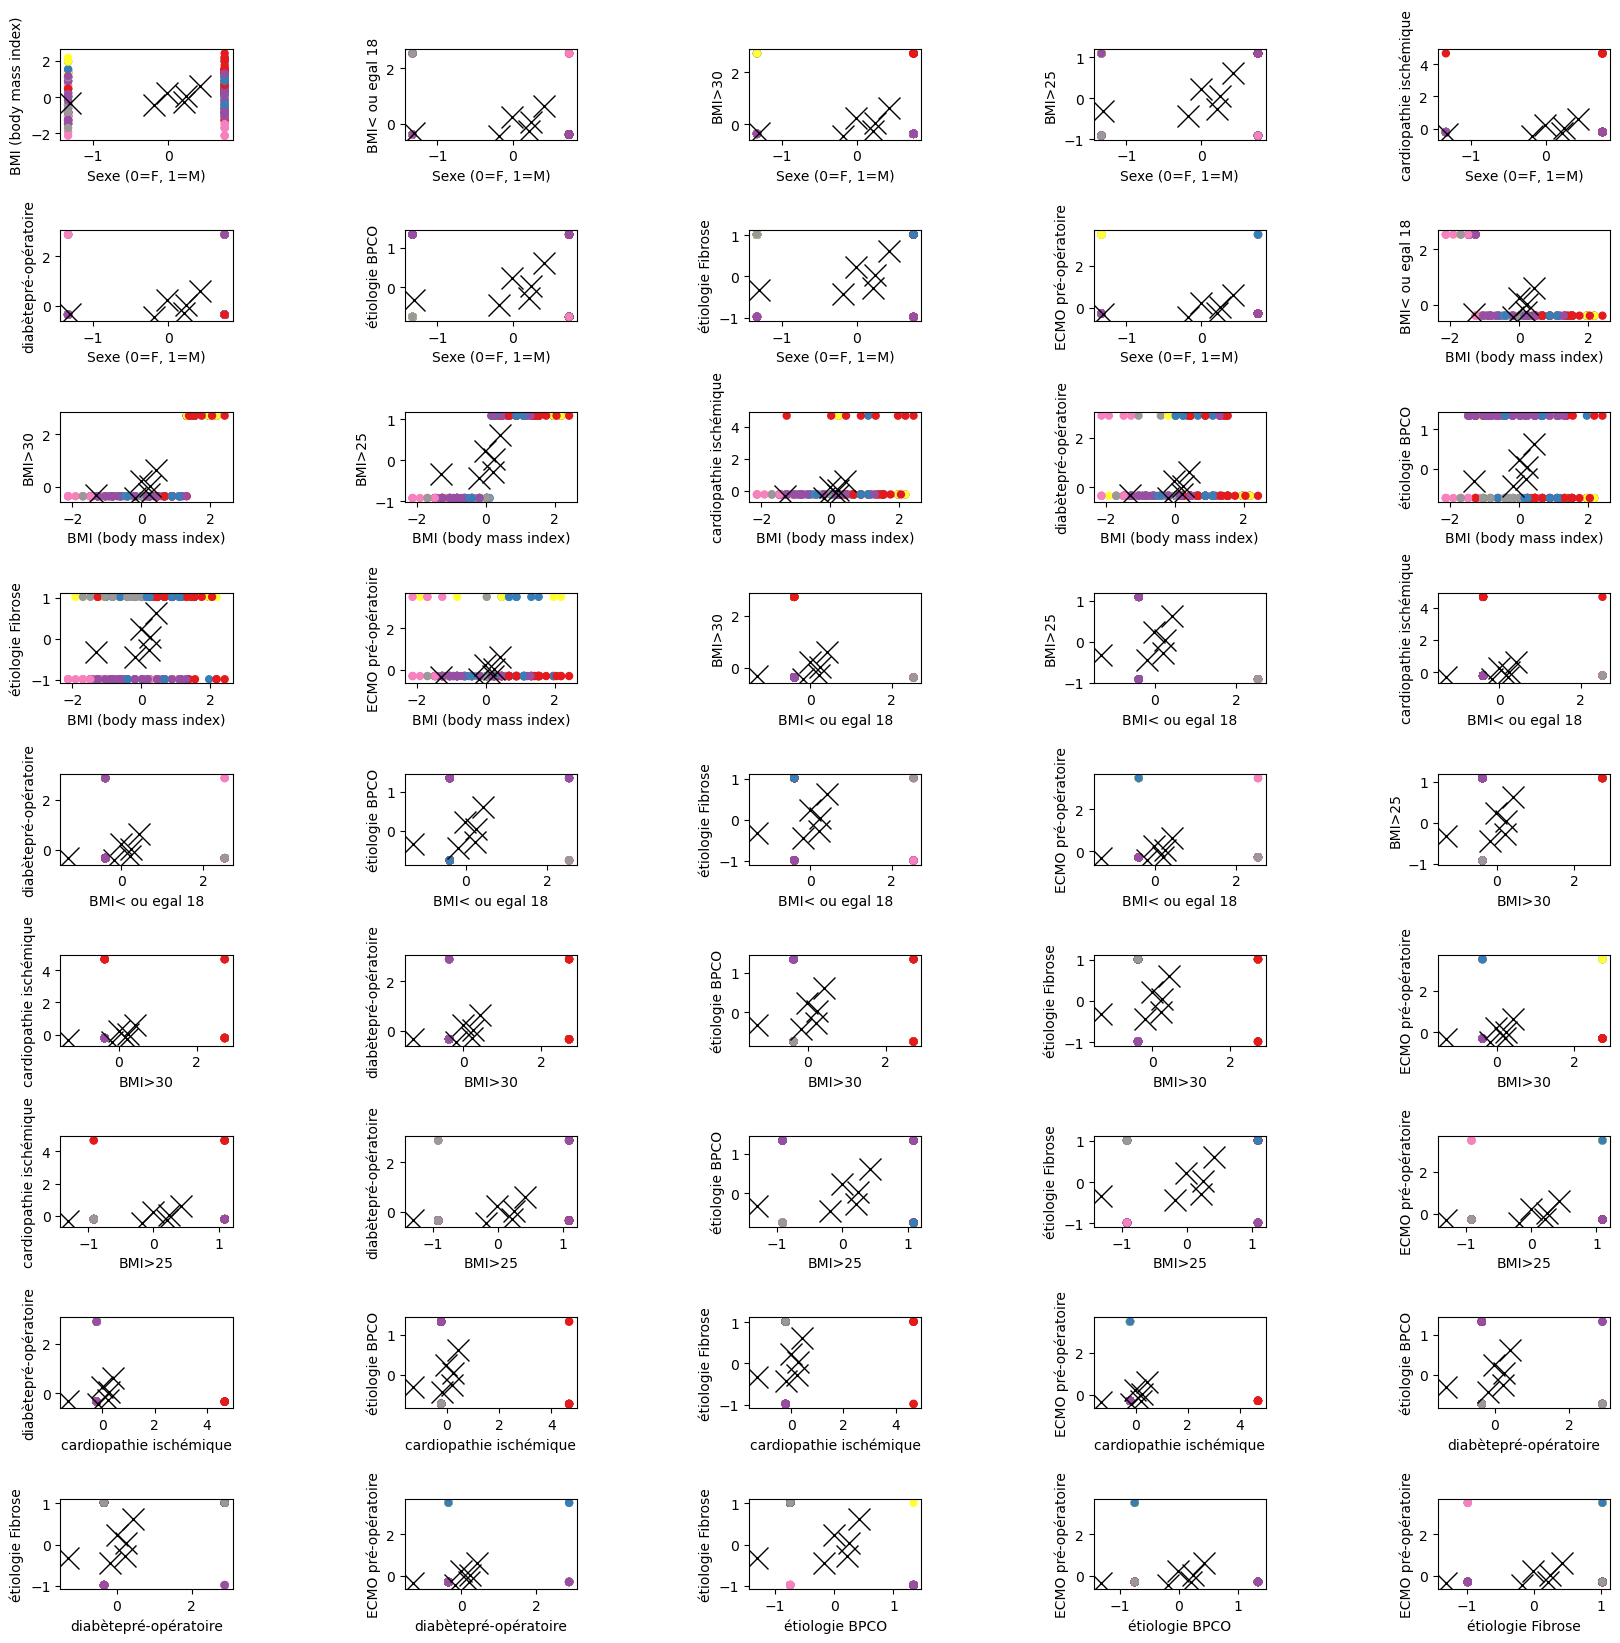

In [100]:
kmeans_method(df,6)

# Feature Engineering

To avoid outliers impacting feature scaling, Robust Data Scaling must be used. This will also help us mitigate the impact of outliers on the model overall.

In [101]:
# Defining feature and target set as X and Y respectively
X, Y = datas.drop(['mortalité dans le premier séjour réanimation','mortalité à J30','mortalité à 90j','mortalité à un an','target','Groupedage'],axis=1), datas[['mortalité dans le premier séjour réanimation','mortalité à J30','mortalité à 90j','mortalité à un an','target']]

In [102]:
scaler = RobustScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
x_scaled.describe()

Age  Sexe (0=F, 1=M)  BMI (body mass index)  BMI< ou egal 18  \
count  252.000000       252.000000             252.000000       252.000000   
mean    -0.229497        -0.361111              -0.019161         0.134921   
std      0.918984         0.481279               0.664532         0.342319   
min     -3.500000        -1.000000              -1.428571         0.000000   
25%     -0.583333        -1.000000              -0.571429         0.000000   
50%      0.000000         0.000000               0.000000         0.000000   
75%      0.416667         0.000000               0.428571         0.000000   
max      1.166667         0.000000               1.585714         1.000000   

           BMI>30      BMI>25  cardiopathie ischémique  diabètepré-opératoire  \
count  252.000000  252.000000               252.000000             252.000000   
mean     0.119048    0.456349                 0.043651               0.107143   
std      0.324489    0.499082                 0.204724               0.309910   
min      0.000000    0.000000                 0.000000               0.000000   
25%      0.000000    0.000000                 0.000000               0.000000   
50%      0.000000    0.000000                 0.000000               0.000000   
75%      0.000000    1.000000                 0.000000               0.000000   
max      1.000000    1.000000                 1.000000               1.000000   

       étiologie BPCO  étiologie Fibrose  ...  Autres étiologies  \
count      252.000000         252.000000  ...         252.000000   
mean         0.357143           0.492063  ...           0.156220   
std          0.480111           0.500932  ...           0.362225   
min          0.000000           0.000000  ...           0.000000   
25%          0.000000           0.000000  ...           0.000000   
50%          0.000000           0.000000  ...           0.000000   
75%          1.000000           1.000000  ...           0.000000   
max          1.000000           1.000000  ...           1.000000   

       Mismatch CMV (R-/D+)  Super Urgence  Ischémie Froide Max  \
count            252.000000     252.000000         2.520000e+02   
mean               0.215138       0.187038         5.142131e-02   
std                0.410919       0.390127         7.972010e-01   
min                0.000000       0.000000        -1.978553e+00   
25%                0.000000       0.000000        -4.824899e-01   
50%                0.000000       0.000000         2.237793e-16   
75%                0.000000       0.000000         5.175101e-01   
max                1.000000       1.000000         3.297038e+00   

       Analgésie péridurale   Transfusion per opératoire >2 CGR  \
count             252.000000                         252.000000   
mean               -0.474104                           0.230908   
std                 0.499329                           0.499000   
min                -1.000000                          -0.265414   
25%                -1.000000                          -0.265414   
50%                 0.000000                           0.000000   
75%                 0.000000                           0.734586   
max                 0.000000                           0.734586   

       Nb Jours Noradrénaline   Pneumonie (tous germes)  \
count               252.000000               252.000000   
mean                  0.489139                -0.139433   
std                   1.766076                 0.346407   
min                  -0.666667                -1.000000   
25%                  -0.333333                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.666667                 0.000000   
max                  16.000000                 0.000000   

       rejet cellulaire dans l'année   pleurésie <1an  
count                      252.000000      252.000000  
mean                         0.243155        0.153613  
std                          0.428917        0.357924  
min 

In [103]:
#Refaire le kmeans et le DBSCAN

In [104]:
%store x_scaled
%store Y

Stored 'x_scaled' (DataFrame)
Stored 'Y' (DataFrame)
